Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)
head(airbnb)

,ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,⋯,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>
1,12768616,https://www.airbnb.com/rooms/12768616,2.017041e+13,2017-04-08,Ramblas Studio D,"Unique apartment in vibrant neighborhoods, carefully selected by expert to make sure you like them as much as we do. A local concierge will welcome you and guide you during your entire stay to assist you in everything you may need. Licence Number: HUTB - 002945","Centrally located in the atmospheric Gothic Quarter, just seconds from La Ramblas, the elegant Ramblas Studio holiday apartment promises to make your stay in Barcelona extra special. This delightful studio apartment is cleverly designed making full use of the space perfectly. You will find large French windows open wide to reveal a pretty Juliette balcony allowing lots of natural day light. The walls are painted a cool creamy colour with exposed wooden ceiling beams over head and light wooden floorboards under foot. The apartment is elegantly furnished with stylish contemporary furniture and attractive art works on the walls. Relax with your guests in the living room in front of the flat screen TV from the comfort of the big comfy sofa. It also converts quickly into a double bed for two of your guests. Mealtimes are easily taken care of in the excellent fully fitted kitchen. Rustle up a quick snack or serve a three course meal at the dining table and chairs also provided. The bedroom h","Unique apartment in vibrant neighborhoods, carefully selected by expert to make sure you like them as much as we do. A local concierge will welcome you and guide you during your entire stay to assist you in everything you may need. Licence Number: HUTB - 002945 Centrally located in the atmospheric Gothic Quarter, just seconds from La Ramblas, the elegant Ramblas Studio holiday apartment promises to make your stay in Barcelona extra special. This delightful studio apartment is cleverly designed making full use of the space perfectly. You will find large French windows open wide to reveal a pretty Juliette balcony allowing lots of natural day light. The walls are painted a cool creamy colour with exposed wooden ceiling beams over head and light wooden floorboards under foot. The apartment is elegantly furnished with stylish contemporary furniture and attractive art works on the walls. Relax with your guests in the living room in front of the flat screen TV from the comfort of the big com",none,"Located on the edge of the Gothic Quarter of Barcelona the Ramblas Studio apartment is perfectly situated for visiting all the major sites the city has to offer. The apartment is named after the nearby famous La Ramblas shopping street which strikes its way south 1.2 kms through this historic medieval neighbourhood. Fight your way through the crowds of people to get to the stalls to see the local produce on sale. You will be flanked by mimes, jugglers, buskers and other street theatricals not to mention the famously creative human statues. Try to avoid their gaze if you can or you will find yourself donating all your loose change. Unfortunately this cultural hub is also a magnet for pick pockets so keep your valuables out of sight at all times. Ideally visit this area as early in the day as possible to avoid the crowds. To the immediate east, just a few minutes away, lies the stunning Plaza Real, an architectural masterpiece where you can also find street lanterns designed by Antoni Ga",⋯,NA,NA,NA,,,strict,92,NA,"41.3838872822,2.17180232785","Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License"
2,1629146,https://www.airbnb.com/rooms/1629146,2.017041e+13,2017-04-08

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
#library(dplyr)
df_airbnb<-data.frame(airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')])
df_airbnb$Square.Meters<-df_airbnb$Square.Feet*0.092903

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [4]:
df_airbnb$Neighbourhood[airbnb$Neighbourhood=='']<-NA
df_madrid<-subset(df_airbnb,City=='Madrid' & Room.Type=='Entire home/apt' & Neighbourhood!='NA')
df_madrid$City<-NULL
df_madrid$Room.Type<-NULL
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
18,Palacio,3,1,0,2,65,NA,2,10,96,40.41706,-3.709482,NA
19,Palacio,5,2,2,3,100,NA,4,25,97,40.41934,-3.709556,NA
20,Palacio,6,1,2,4,89,NA,2,10,94,40.42113,-3.708628,NA
21,La Latina,4,1,1,2,49,0,2,20,89,40.41203,-3.709668,0
22,La Latina,4,1,1,1,89,NA,2,15,97,40.41205,-3.708516,NA
25,La Latina,2,1,1,1,61,NA,1,0,95,40.41189,-3.712093,NA


In [5]:
paste("Hay",length(unique(df_madrid$Neighbourhood))," Barrios")
unique(df_madrid$Neighbourhood)

[1] "Hay 65  Barrios"

[1] Palacio             La Latina           Embajadores        
 [4] Cortes              Justicia            Sol                
 [7] Malasaña            Imperial            Centro             
[10] La Chopera          Legazpi             Palos do Moguer    
[13] Adelfas             Arapiles            Trafalgar          
[16] Almagro             Nueva España        Bellas Vistas      
[19] Cuatro Caminos      El Tréntaiseis      Goya               
[22] Recoletos           Fuente del Berro    Vallehermosa       
[25] Gaztambide          Guindalera          El Viso            
[28] Argüelles           Puente de Vallecas  Ciudad Lineal      
[31] Hortaleza           Carabanchel         Rios Rosas         
[34] Barajas             Usera               Fuencarral-el Pardo
[37] Aluche              Ciudad Jardin       Hispanoamérica     
[40] Acacias             Delicias            Atocha             
[43] Pacifico            Jerónimos           Estrella           
[46] Lista               Castellana          Castilla           
[49] Moratalaz           Moncloa             San Blas           
[52] Villaverde          Arganzuela          Ibiza              
[55] Retiro              Almenara            Valdeacederas      
[58] Chamberí            Tetuán              Castillejos        
[61] Prosperidad         Berruguete          Villa de Vallecas  
[64] Vicálvaro           Fuencarral-El Pardo
391 Levels:  Acacias Acton Adams Morgan Adelfas Agios Nikolaos ... Zilker

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [7]:
paste("El",round((sum(is.na(df_madrid$Square.Meters))/nrow(df_madrid))*100,digits=2),"% de apartamentos no muestra los metros cuadrados")

[1] "El 93.8 % de apartamentos no muestra los metros cuadrados"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [8]:
paste("Hay",length(na.omit(df_madrid$Square.Meters)),"apartamentos con un valor de metros cuadrados diferente de NA.")
paste("Hay",nrow(subset(df_madrid,df_madrid$Square.Meters=='0')),"apartamentos con un valor de metros cuadrados igual a 0.")
paste("El",round((nrow(subset(df_madrid,df_madrid$Square.Meters=='0'))/length(na.omit(df_madrid$Square.Meters)))*100,2),"% de apartamentos tienen 0 metros cuadrados.")

[1] "Hay 347 apartamentos con un valor de metros cuadrados diferente de NA."

[1] "Hay 128 apartamentos con un valor de metros cuadrados igual a 0."

[1] "El 36.89 % de apartamentos tienen 0 metros cuadrados."

Reemplazar todos los 0m^2 por NA 

In [11]:
df_madrid$Square.Feet[df_madrid$Square.Feet=='0']<-NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

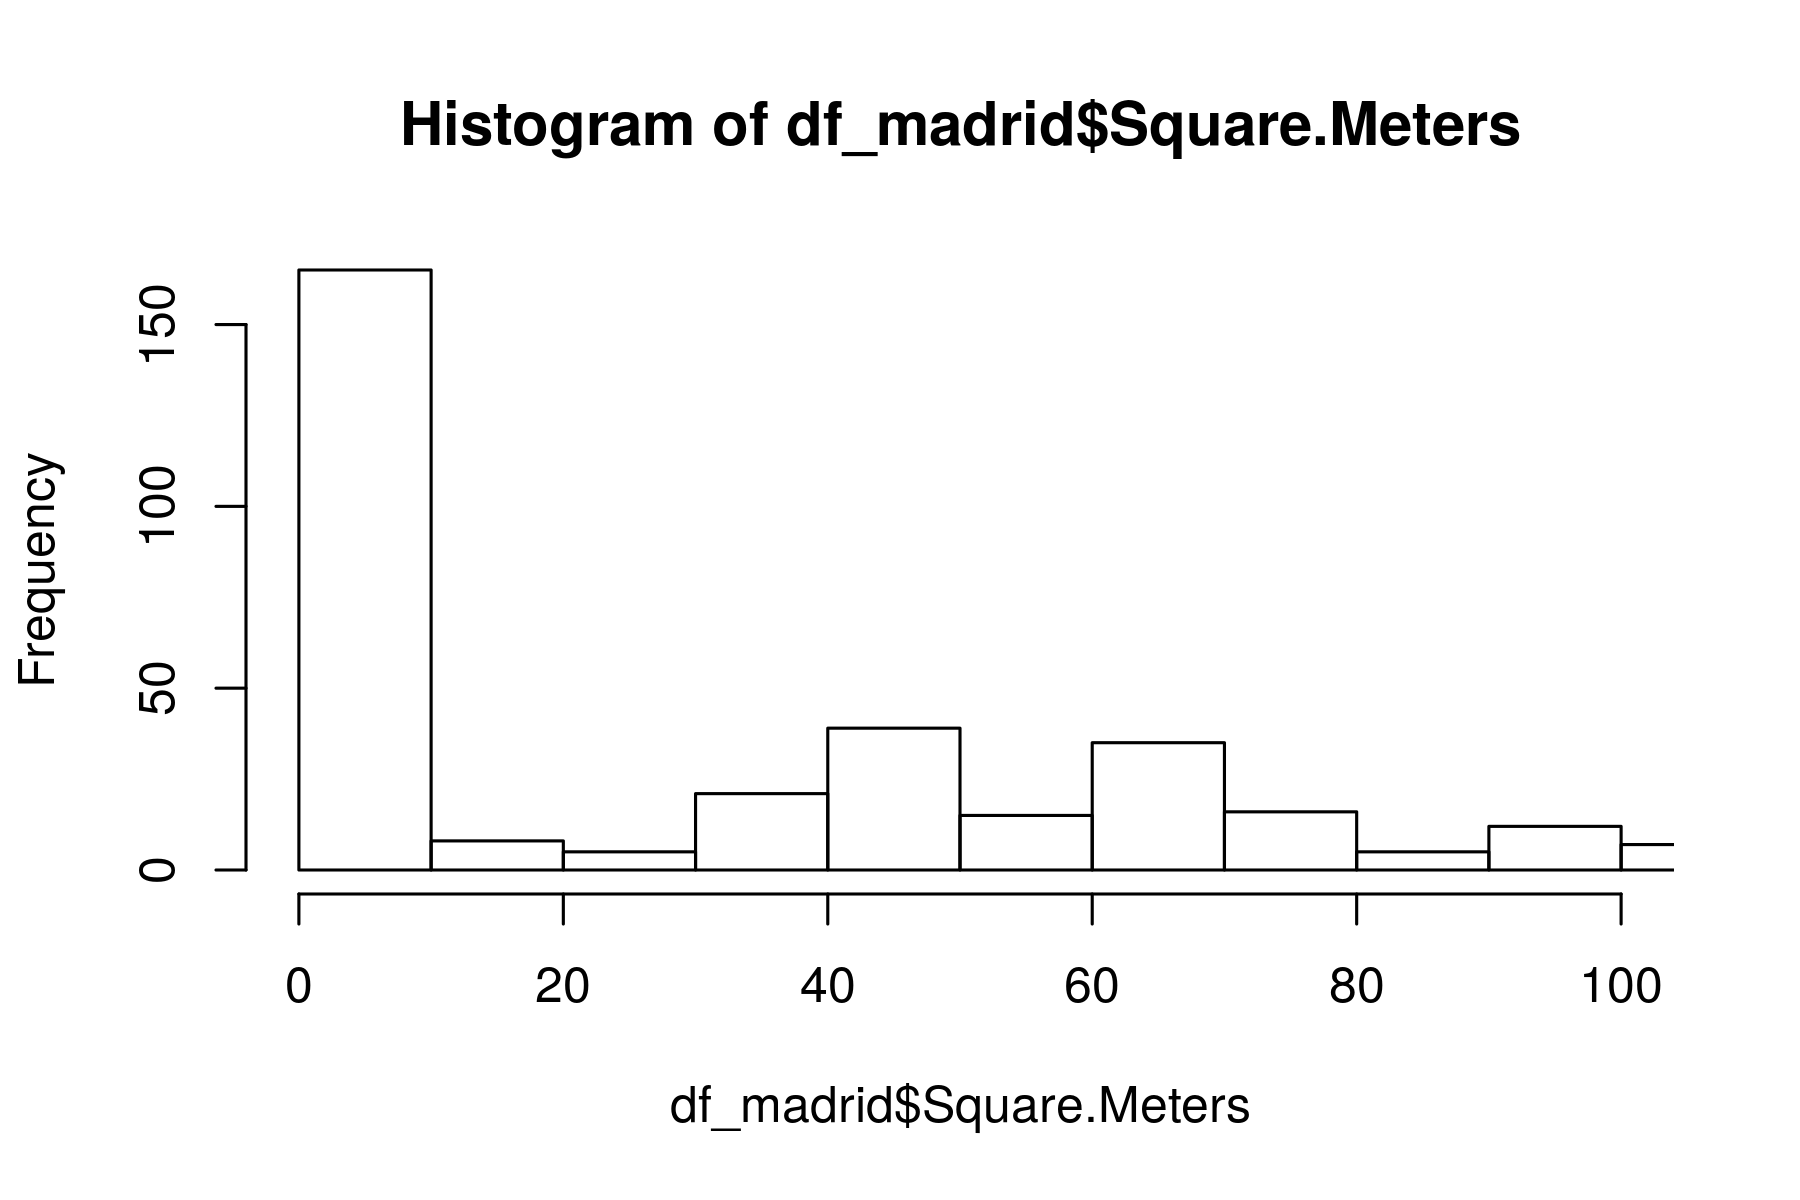

In [13]:
hist(df_madrid$Square.Meters, breaks=50, xlim=c(0,100))

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [14]:
df_madrid$Square.Meters[df_madrid$Square.Meters<20]<-NA
sort(table(df_madrid$Square.Meters),decreasing = T)
na.omit(df_madrid$Square.Meters)
#na.omit(df_madrid$Square.Meters[df_madrid$Square.Meters>'20'])
length(levels(df_madrid$Neighbourhood))
length(sort(unique(df_madrid$Neighbourhood)))


 44.965052  60.015338  49.981814  74.972721  69.955959  40.041193    65.0321 
        15         13         12         12         11         10          9 
 30.007669  54.998576  99.963628  35.024431 120.030676  56.020509  79.989483 
         8          7          7          5          5          4          4 
 90.023007 109.997152  85.006245 200.020159  24.990907  31.958632  36.975394 
         4          4          3          3          2          2          2 
 37.997327  57.971472  104.98039 140.004821  22.018011  27.034773  27.963803 
         2          2          2          2          1          1          1 
 36.046364   39.01926  41.992156  44.036022  51.003747   52.02568   60.38695 
         1          1          1          1          1          1          1 
 68.004996  82.033349  87.979141  96.990732 108.046189 115.013914 124.954535 
         1          1          1          1          1          1          1 
125.976468 134.988059 150.038345 158.957033 159.978966 164.9957

[1]  44.03602  44.96505  79.98948  69.95596  90.02301  49.98181  54.99858
  [8]  85.00624  40.04119  40.04119 159.97897  27.96380  40.04119  22.01801
 [15]  44.96505  44.96505  74.97272  54.99858  69.95596  49.98181 109.99715
 [22]  30.00767  96.99073  69.95596  99.96363  87.97914  52.02568  49.98181
 [29]  31.95863  56.02051  44.96505  54.99858  49.98181  36.04636  49.98181
 [36] 134.98806 120.03068  60.01534  74.97272  40.04119  49.98181 200.02016
 [43]  65.03210 158.95703  74.97272  44.96505  69.95596  65.03210  30.00767
 [50]  69.95596  30.00767  44.96505  99.96363  79.98948  30.00767 125.97647
 [57]  44.96505 140.00482  69.95596 109.99715  56.02051 109.99715 124.95453
 [64]  60.01534  60.38695  35.02443  40.04119  60.01534  99.96363  60.01534
 [71] 109.99715  27.03477  74.97272  40.04119  44.96505  60.01534  44.96505
 [78]  35.02443 104.98039 120.03068  99.96363 200.02016  60.01534  90.02301
 [85]  31.95863 108.04619  40.04119  74.97272  24.99091  41.99216  74.97272
 [92]  74.97272  36.97539  90.02301  51.00375  69.95596  30.00767  68.00500
 [99]  44.96505  54.99858  36.97539  60.01534  74.97272  99.96363  54.99858
[106] 104.98039  79.98948  35.02443  65.03210  65.03210  69.95596  54.99858
[113]  85.00624  54.99858  37.99733  49.98181  44.96505  40.04119  79.98948
[120]  40.04119  49.98181  35.02443  49.98181  57.97147  60.01534  69.95596
[127] 140.00482 120.03068  60.01534  44.96505  60.01534  30.00767  65.03210
[134] 480.02980  56.02051  65.03210  44.96505  35.02443 200.02016  99.96363
[141] 120.03068  57.97147  74.97272  39.01926  74.97272 164.99573  60.01534
[148]  74.97272  60.01534 115.01391 120.03068  85.00624  30.00767  65.03210
[155]  37.99733  74.97272  24.99091  69.95596  49.98181  90.02301  49.98181
[162]  65.03210  99.96363  65.03210  69.95596  56.02051  44.96505 150.03834
[169]  30.00767  60.01534  40.04119  44.96505  49.98181  82.03335
attr(,"na.action")
   [1]    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  [15]   15   16   17   18   19   20   21   23   24   25   26   27   28   29
  [29]   30   31   32   33   34   35   36   37   38   39   40   41   42   43
  [43]   44   45   46   47   48   49   50   51   52   53   54   55   56   57
  [57]   58   59   60   61   62   63   64   65   66   67   68   69   70   71
  [71]   72   73   74   75   76   77   79   80   81   82   83   84   85   86
  [85]   87   88   89   90   91   92   93   94   95   96   97   98   99  100
  [99]  101  102  103  104  105  107  108  109  110  111  112  113  115  116
 [113]  117  118  119  120  121  122  123  124  125  126  127  128  129  130
 [127]  131  132  134  135  136  137  138  139  140  141  142  143  144  145
 [141]  146  147  148  149  150  151  152  153  154  155  156  157  159  160
 [155]  161  162  163  164  165  166  167  168  169  170  171  172  173  174
 [169]  175  176  177  178  179  180  181  182  183  184  185  186  187  188
 [183]  189  190  191  192  193  194  195  196  197  198  199  200  201  202
 [197]  203  204  205  206  207  208  209  210  211  212  213  214  215  216
 [211]  217  218  219  220  221  222  223  224  225  226  227  228  229  230
 [225]  231  232  233  234  235  236  237  238  239  240  241  242  243  244
 [239]  245  246  248  249  250  251  252  253  254  255  256  257  258  259
 [253]  260  261  262  263  264  265  266  267  268  269  270  271  272  273
 [267]  274  275  276  277  278  279  280  281  282  283  284  285  286  287
 [281]  288  289  290  291  292  293  294  295  296  297  298  299  300  301
 [295]  302  303  304  305  306  307  308  309  310  311  312  313  314  315
 [309]  316  317  318  319  320  321  322  323  324  325  326  327  328  329
 [323]  330  331  332  333  334  335  336  337  338  339  340  341  342  343
 [337]  344  345  346  347  348  349  350  351  352  353  354  355  356  357
 [351]  358  359  360  361  362  363  364  365  366  367  368  369  370  371
 [365]  372  373  374  375  376  377  378  379  380  381  382  383  384  385
 [379]  386  3

[1] 391

[1] 65

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


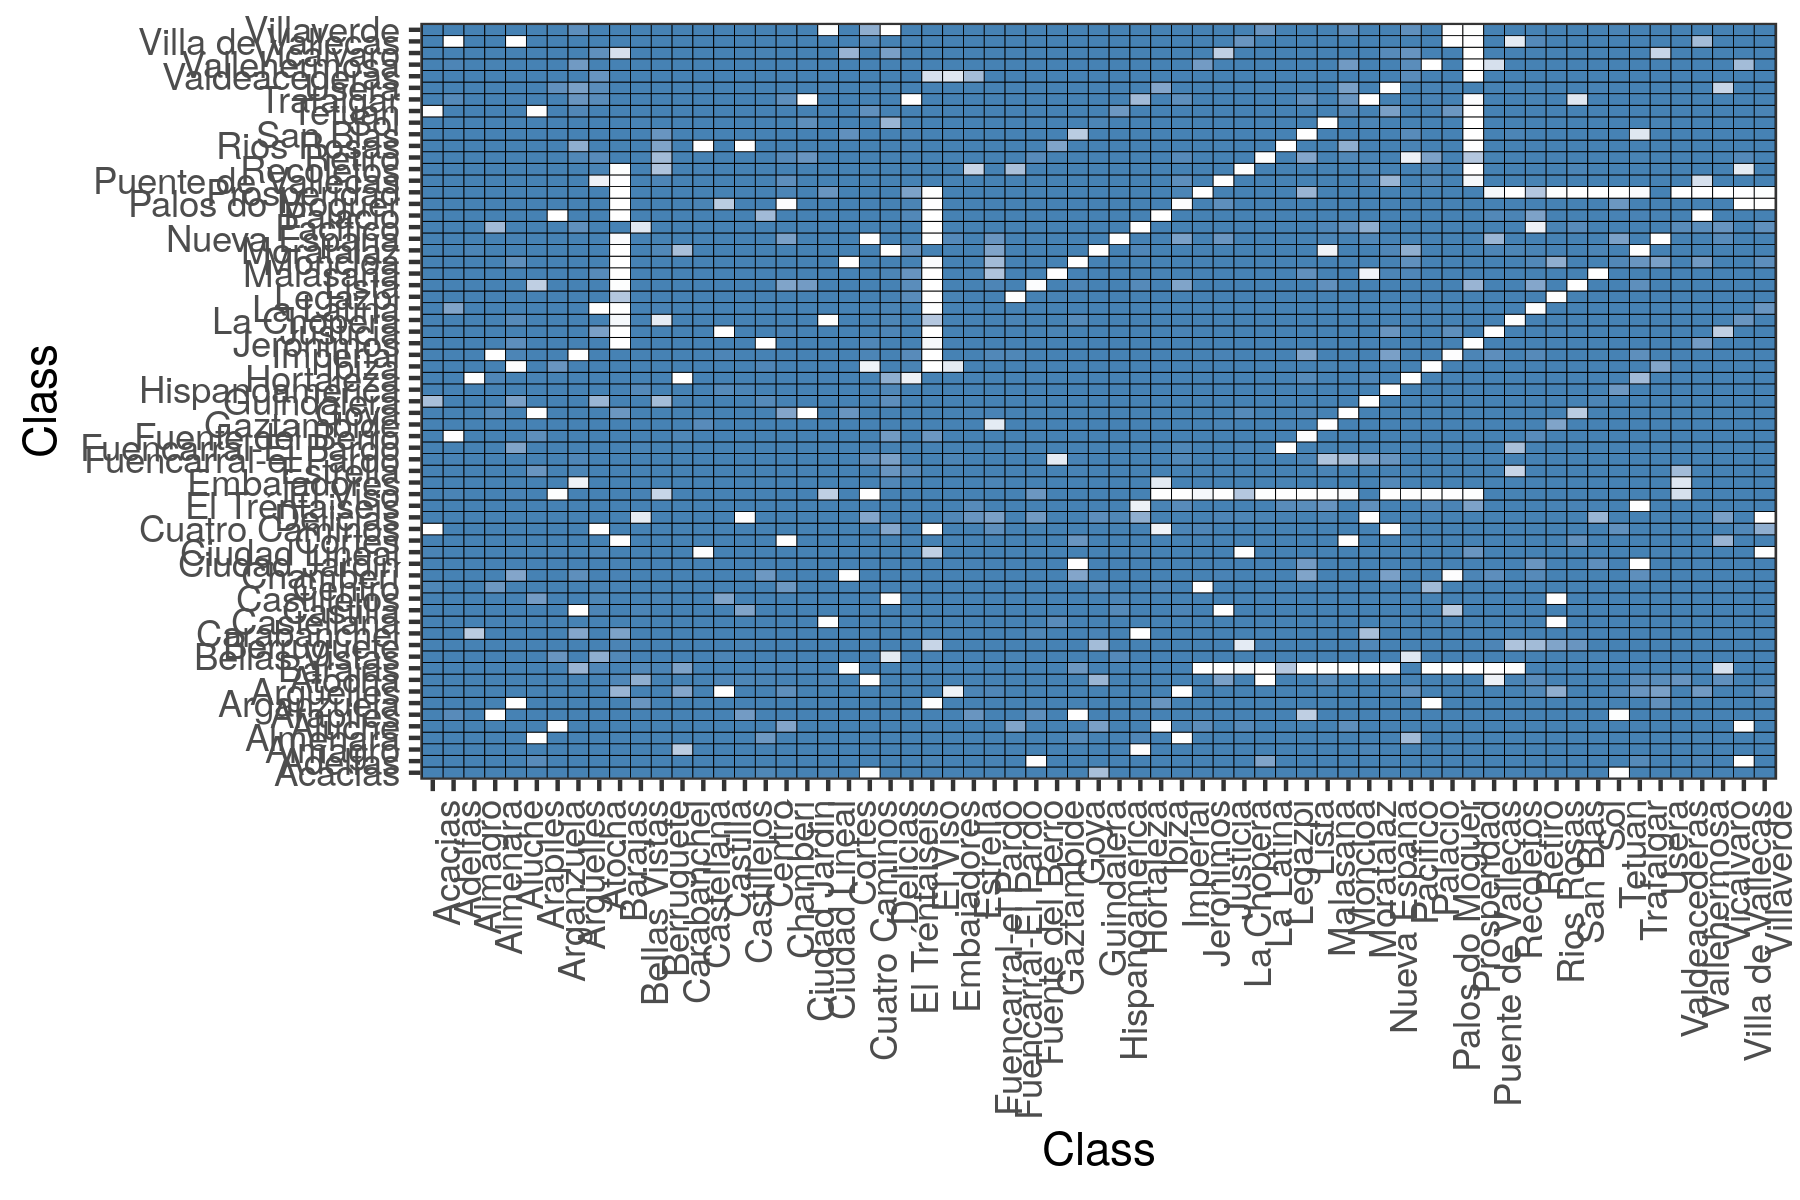

In [15]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


[1] "Salen 7 clusters."

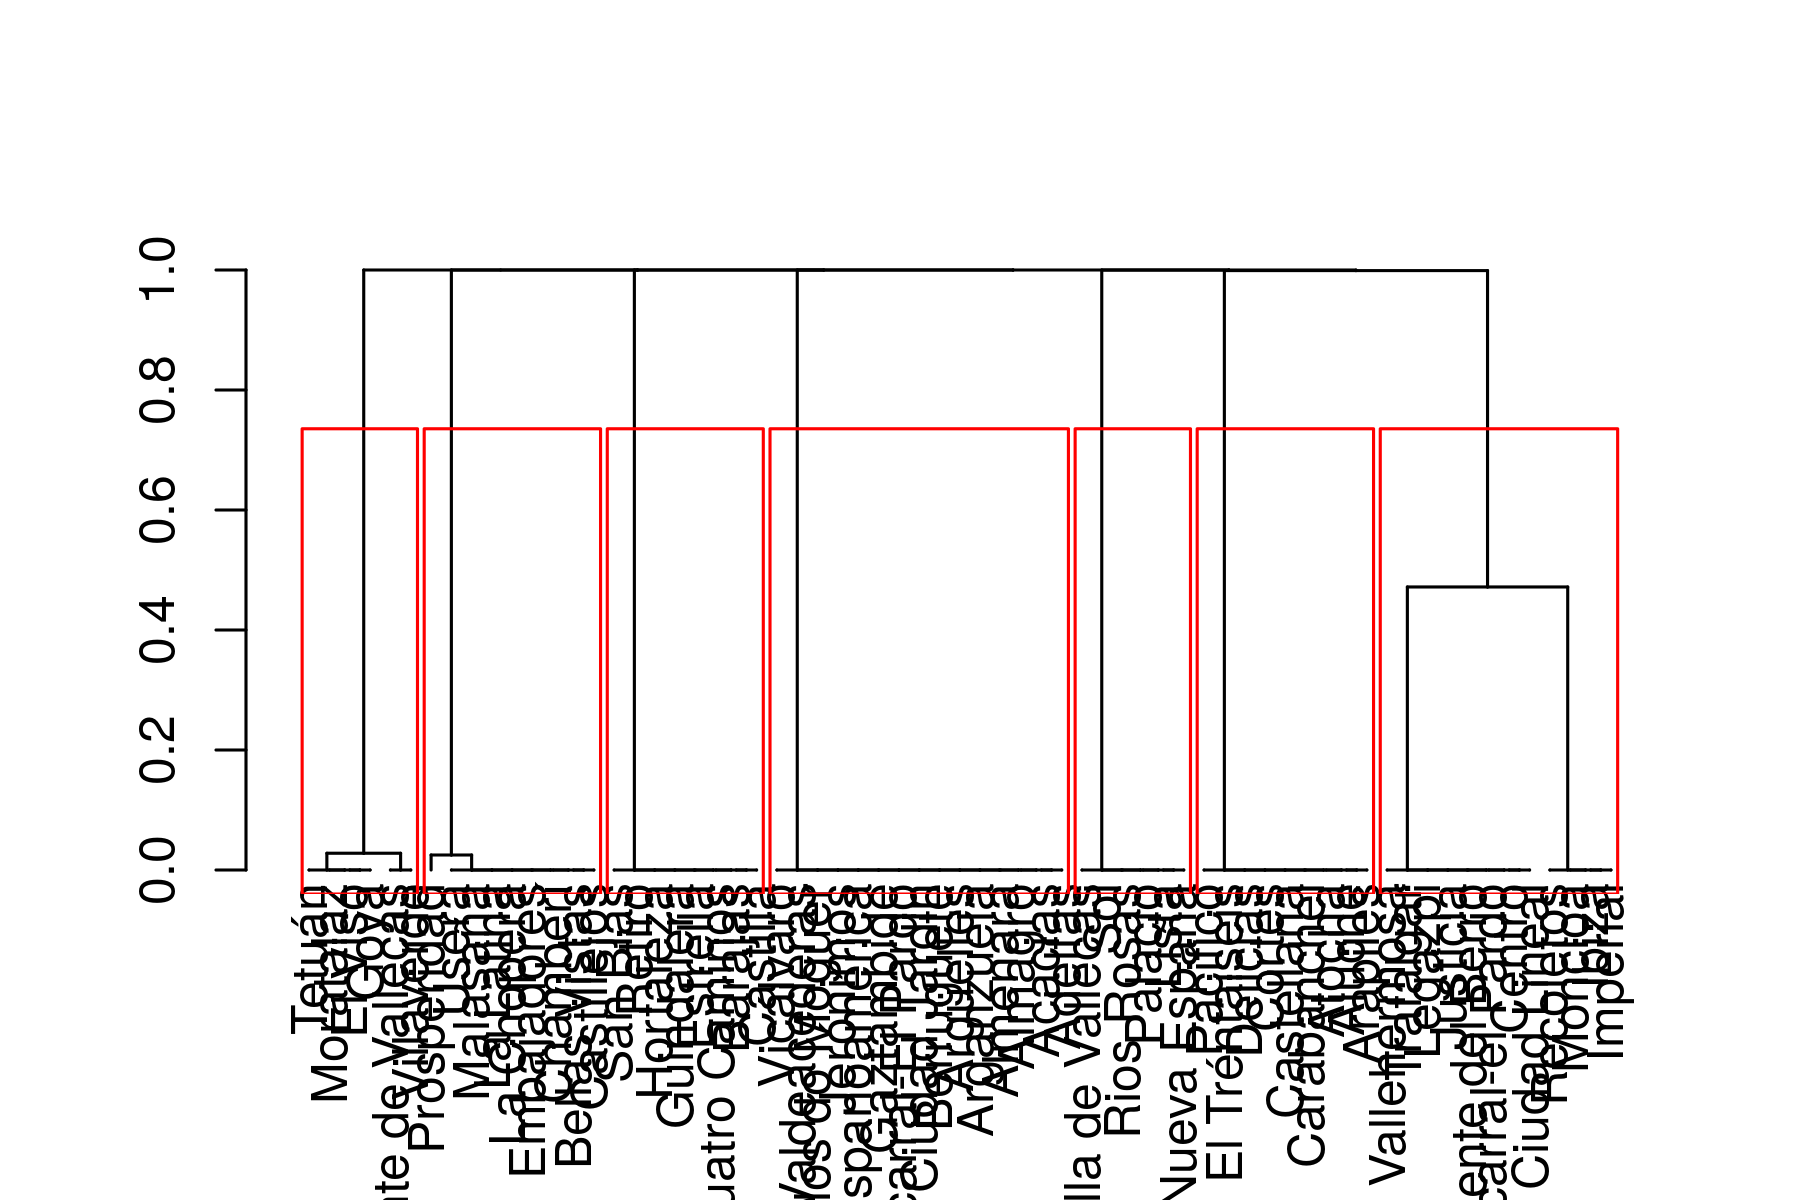

In [17]:
distance<-as.dist(1 - resm)
hc <- hclust(distance,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

ncluster<-rect.hclust(hc, h=0.9)
paste("Salen", length(ncluster), "clusters.")

In [173]:
hc$height[hc$height>0.01]

[1] 0.0673 0.8958 1.0000 1.0000 1.0000 1.0000 1.0000

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

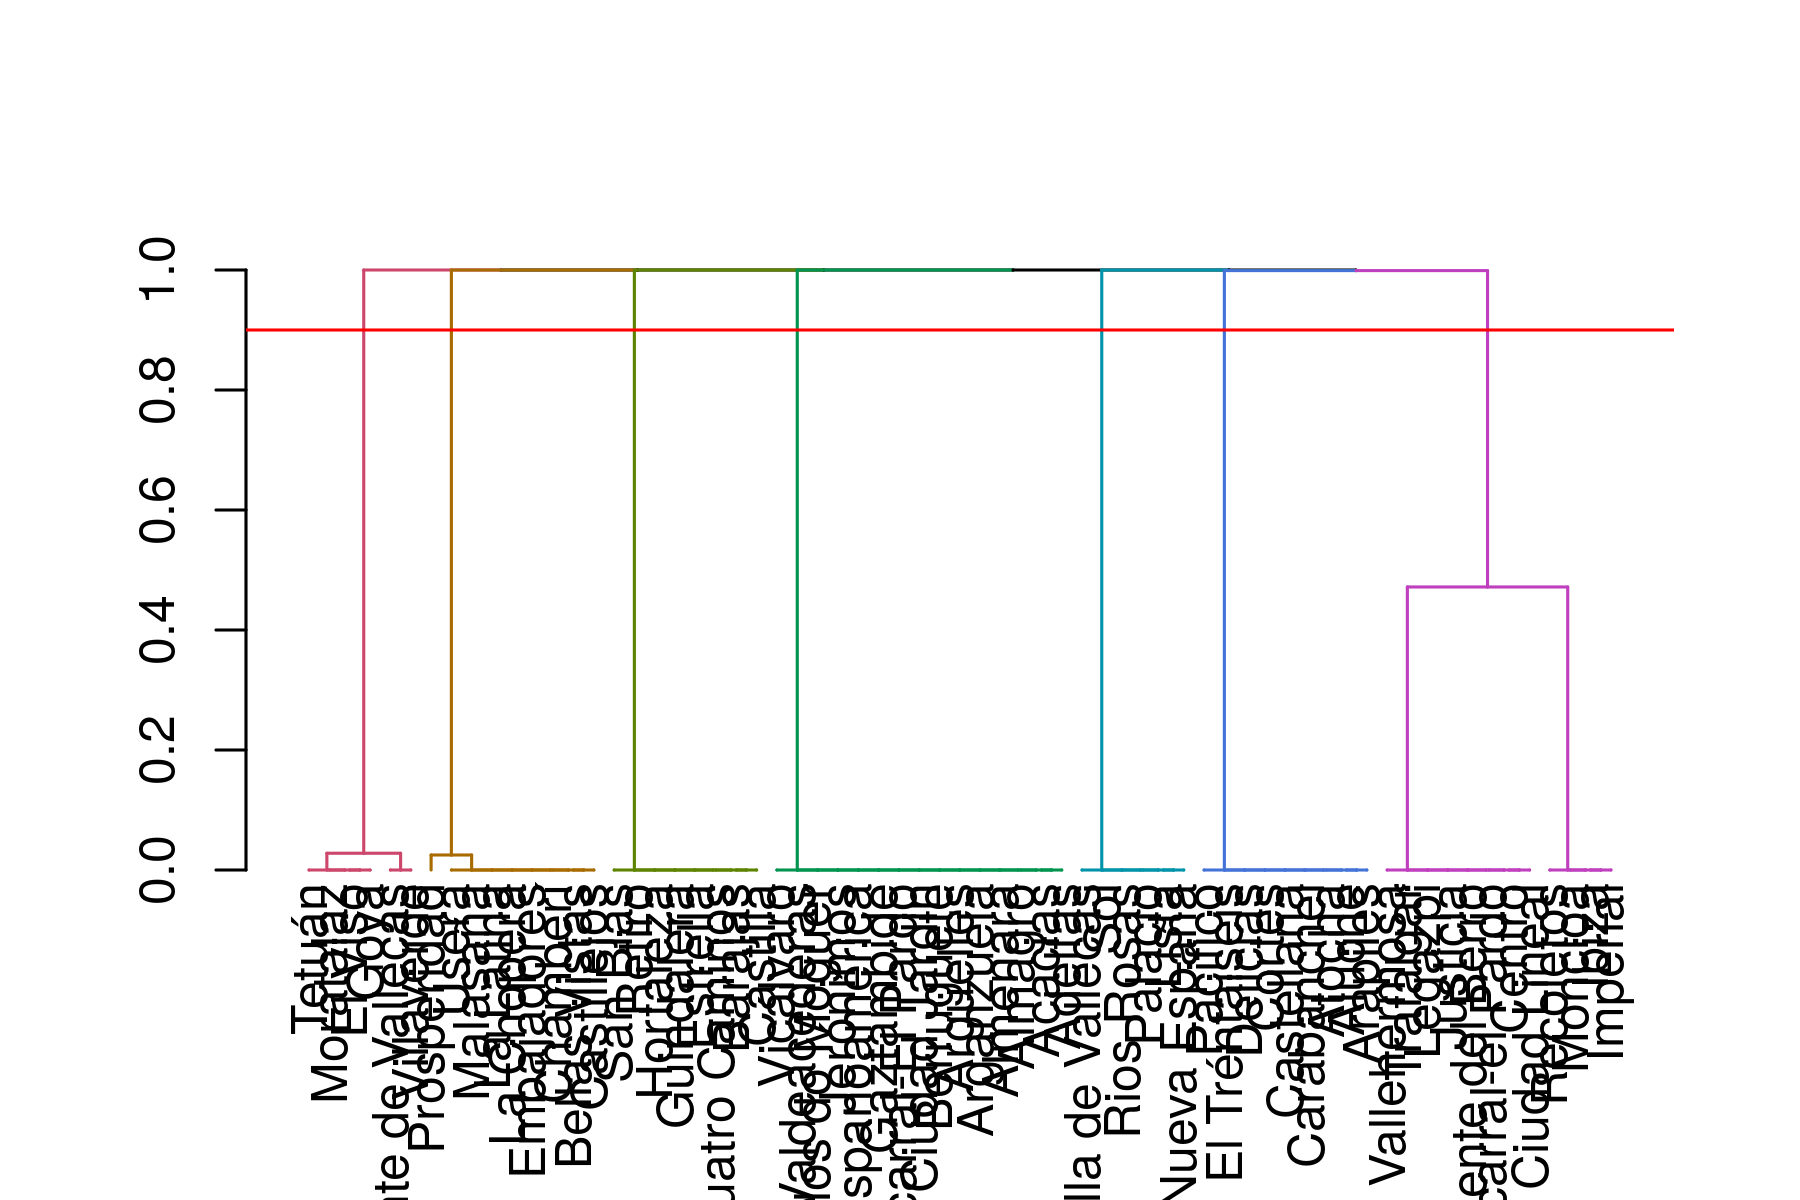

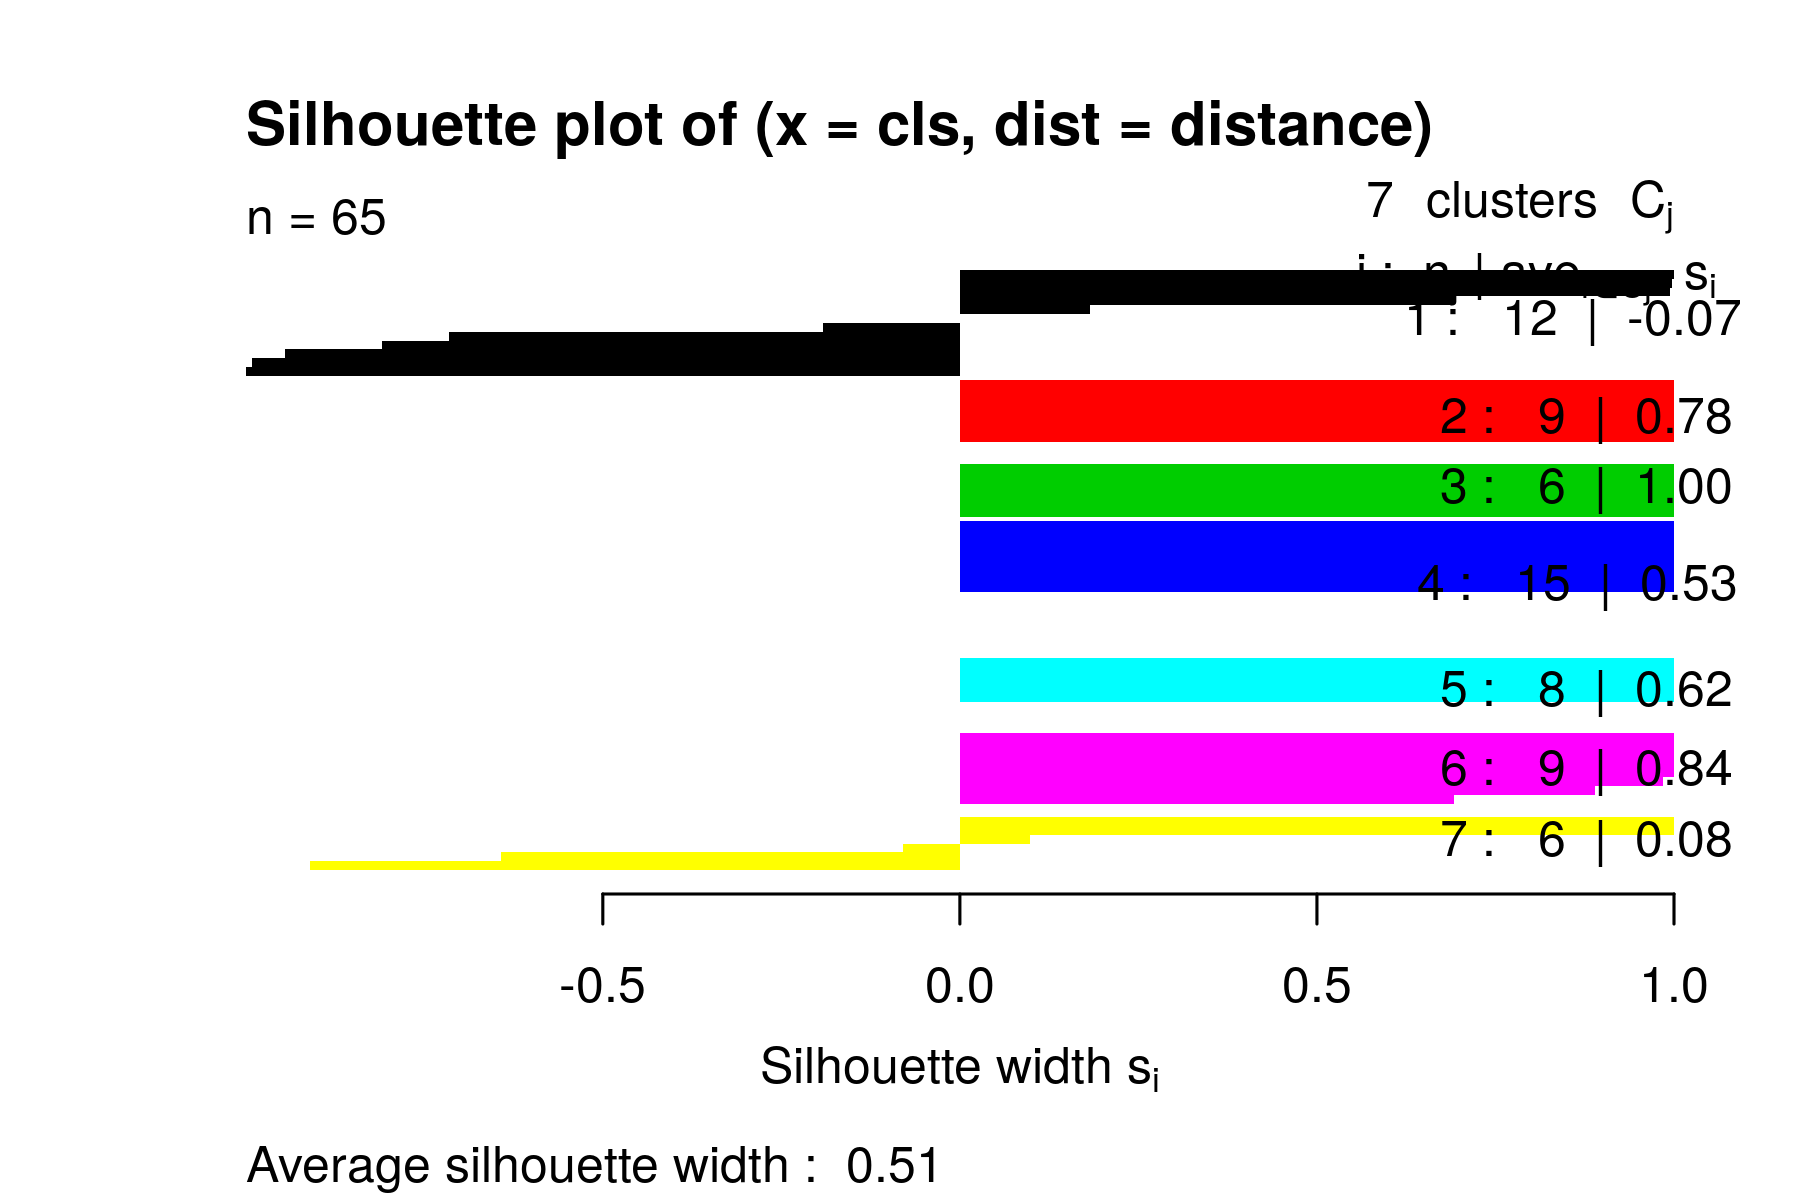

In [20]:
library(dendextend)
library(cluster)
cls<-cutree_1h.dendrogram(hcd,h=0.9)
plot(color_branches(hcd, h=0.9))
abline(h=0.9,col="red")
ss<-silhouette(cls, distance)
plot(ss,col=1:max(cls),border=NA)

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [21]:
df_madrid$Neighbourhood<-droplevels(df_madrid$Neighbourhood, exclude = if(anyNA(levels(df_madrid$Neighbourhood))) NA)
                                    
#df_madrid$prueba = factor(cls)
df_madrid$nid <- cls[df_madrid$Neighbourhood]

#Pasamos indicador a factor
df_madrid$nid <- factor(df_madrid$nid)

In [22]:
summary(df_madrid)

     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
 Malasaña   : 679   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Embajadores: 585   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 La Latina  : 571   Median : 4.000   Median :1.000   Median : 1.000  
 Sol        : 536   Mean   : 4.101   Mean   :1.248   Mean   : 1.453  
 Cortes     : 441   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Justicia   : 384   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2405                    NA's   :14      NA's   :7       
      Beds            Price         Square.Feet   Guests.Included 
 Min.   : 1.000   Min.   : 10.00   Min.   :  22   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 56.00   1st Qu.: 323   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 538   Median : 2.000  
 Mean   : 2.393   Mean   : 88.74   Mean   : 622   Mean   : 1.952  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 807   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :850.00   Max

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [66]:
set.seed(12)
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
train.df<-df_madrid[idx,]
test.df<-df_madrid[-idx,]

In [67]:
model_madrid<-lm(Square.Meters~Bedrooms + Beds + Bathrooms + nid,train.df)
summary(modelprueba)


Call:
lm(formula = Square.Meters ~ Bedrooms + Beds + Bathrooms + nid, 
    data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
-98.63 -12.87  -1.11  11.39 142.82 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.5896    10.2784  -1.225 0.223269    
Bedrooms     10.2637     3.9606   2.591 0.010865 *  
Beds          7.0799     1.8947   3.737 0.000299 ***
Bathrooms    36.8431     5.2883   6.967 2.58e-10 ***
nid2          3.9062    11.0579   0.353 0.724584    
nid3         -4.6891    10.6289  -0.441 0.659969    
nid4         22.2225    11.4354   1.943 0.054557 .  
nid5        -15.1148    13.0608  -1.157 0.249695    
nid6          0.1214     9.7029   0.013 0.990041    
nid7          3.4725    18.0957   0.192 0.848180    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.29 on 109 degrees of freedom
  (3801 observations deleted due to missingness)
Multiple R-squared:  0.7417,	Adjusted R-squared:  0

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [68]:
myrsquared<-function(Y,est_Y){
    Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
    return(Rsq)
}

[1] 28.97712

[1] 0.4341034

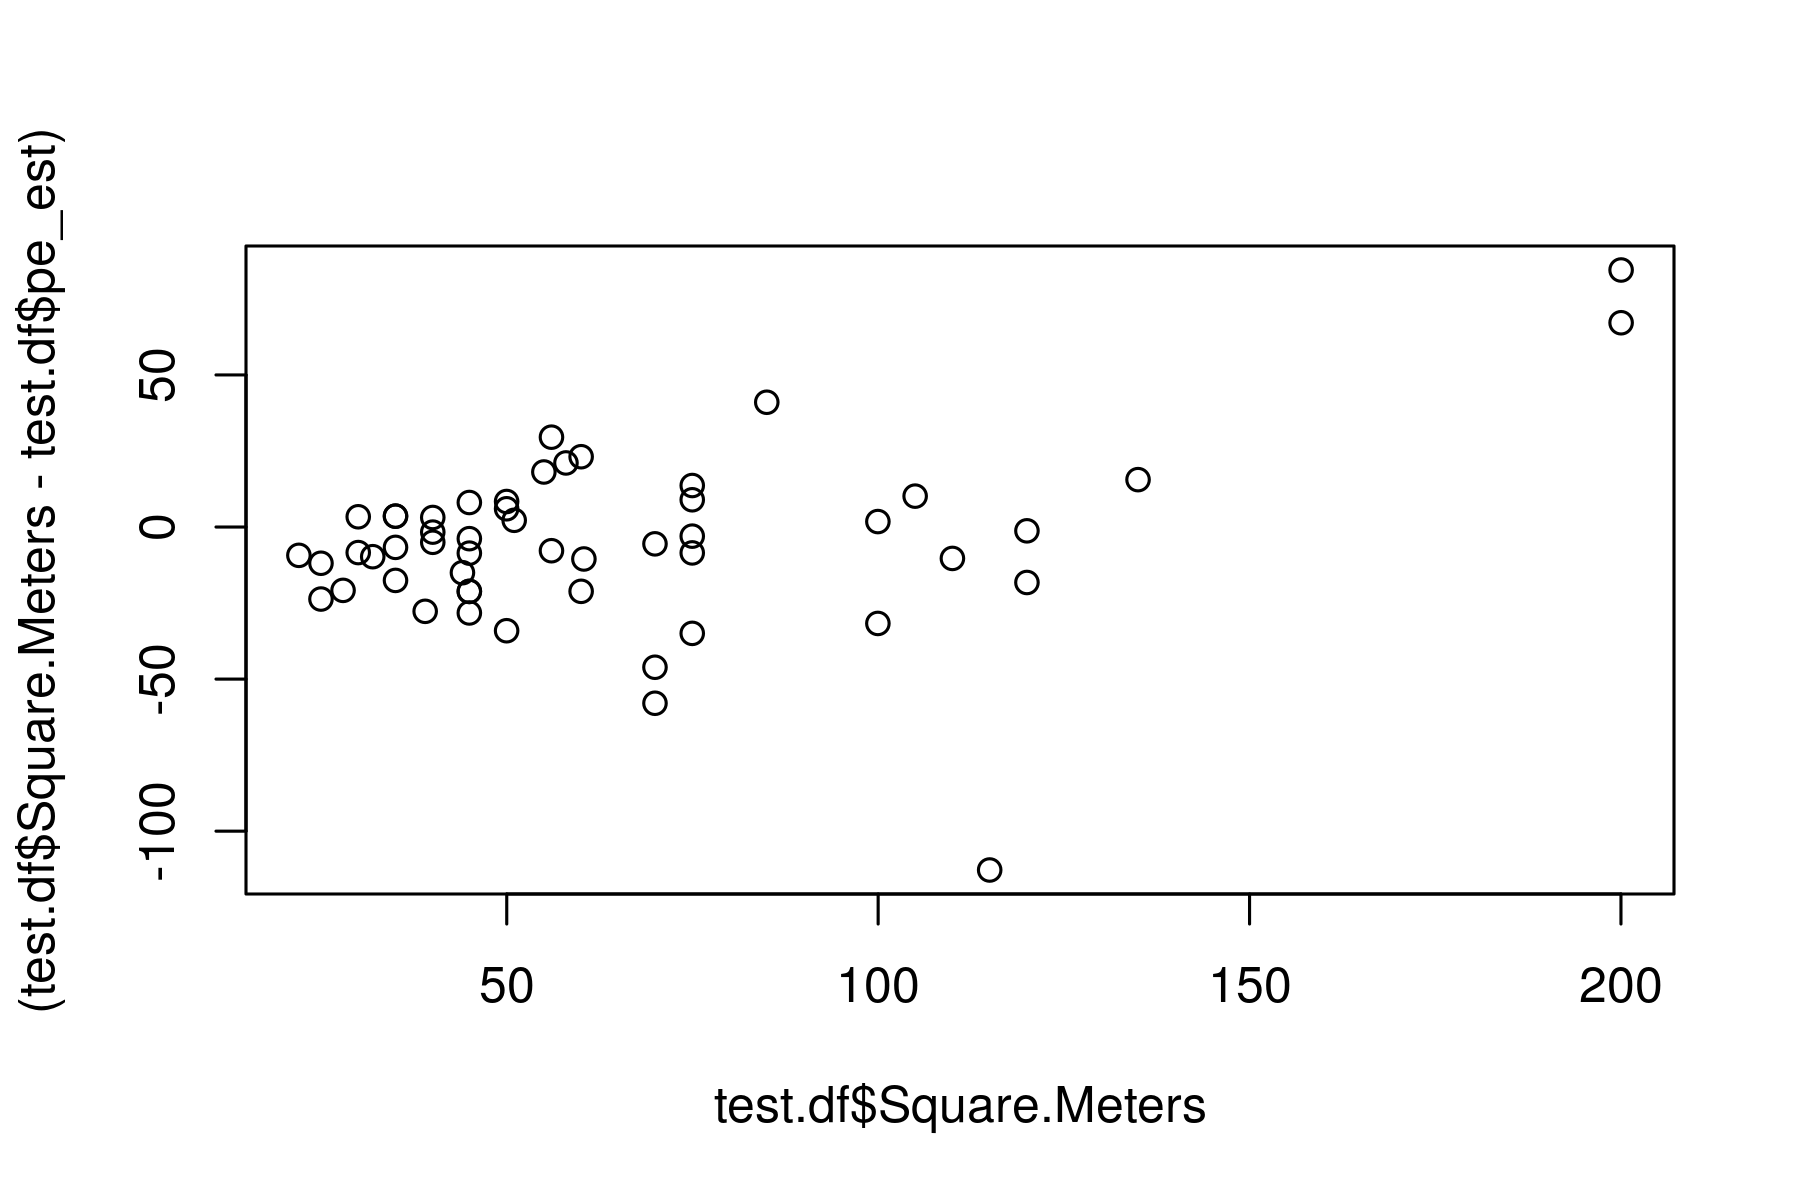

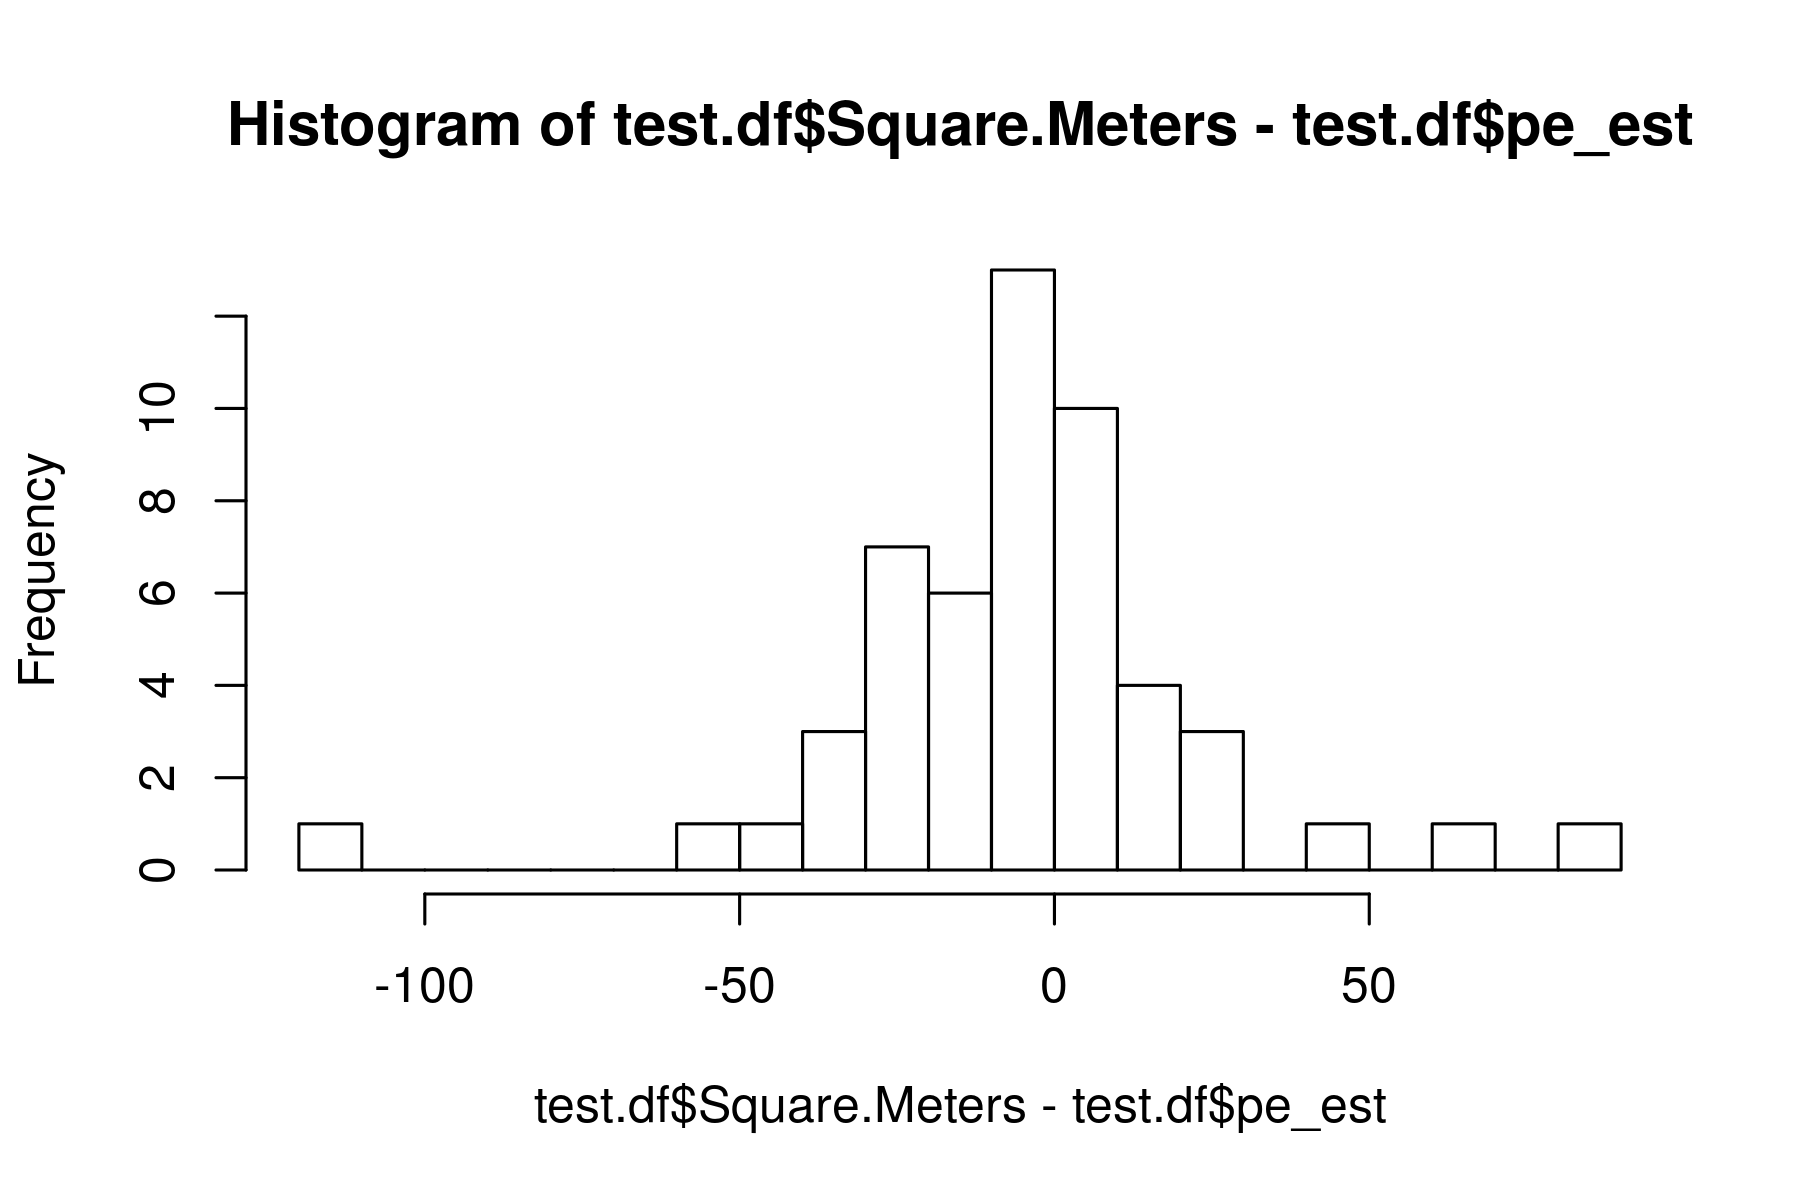

In [69]:
#Analizamos el test
test.df$pe_est<-predict(model_madrid,test.df)

sqrt(mean((test.df$Square.Meters-test.df$pe_est)^2,na.rm=T))
R2<-na.omit(test.df[,c("Square.Meters","pe_est")])
myrsquared(R2$Square.Meters,R2$pe_est)

plot(test.df$Square.Meters,(test.df$Square.Meters-test.df$pe_est))
hist(test.df$Square.Meters-test.df$pe_est,20)

Utilizamos la distancia de Cooks, porque en las gráficas de residuos vemos algunos outlayers que puede que esten empeorando nuestro modelo.

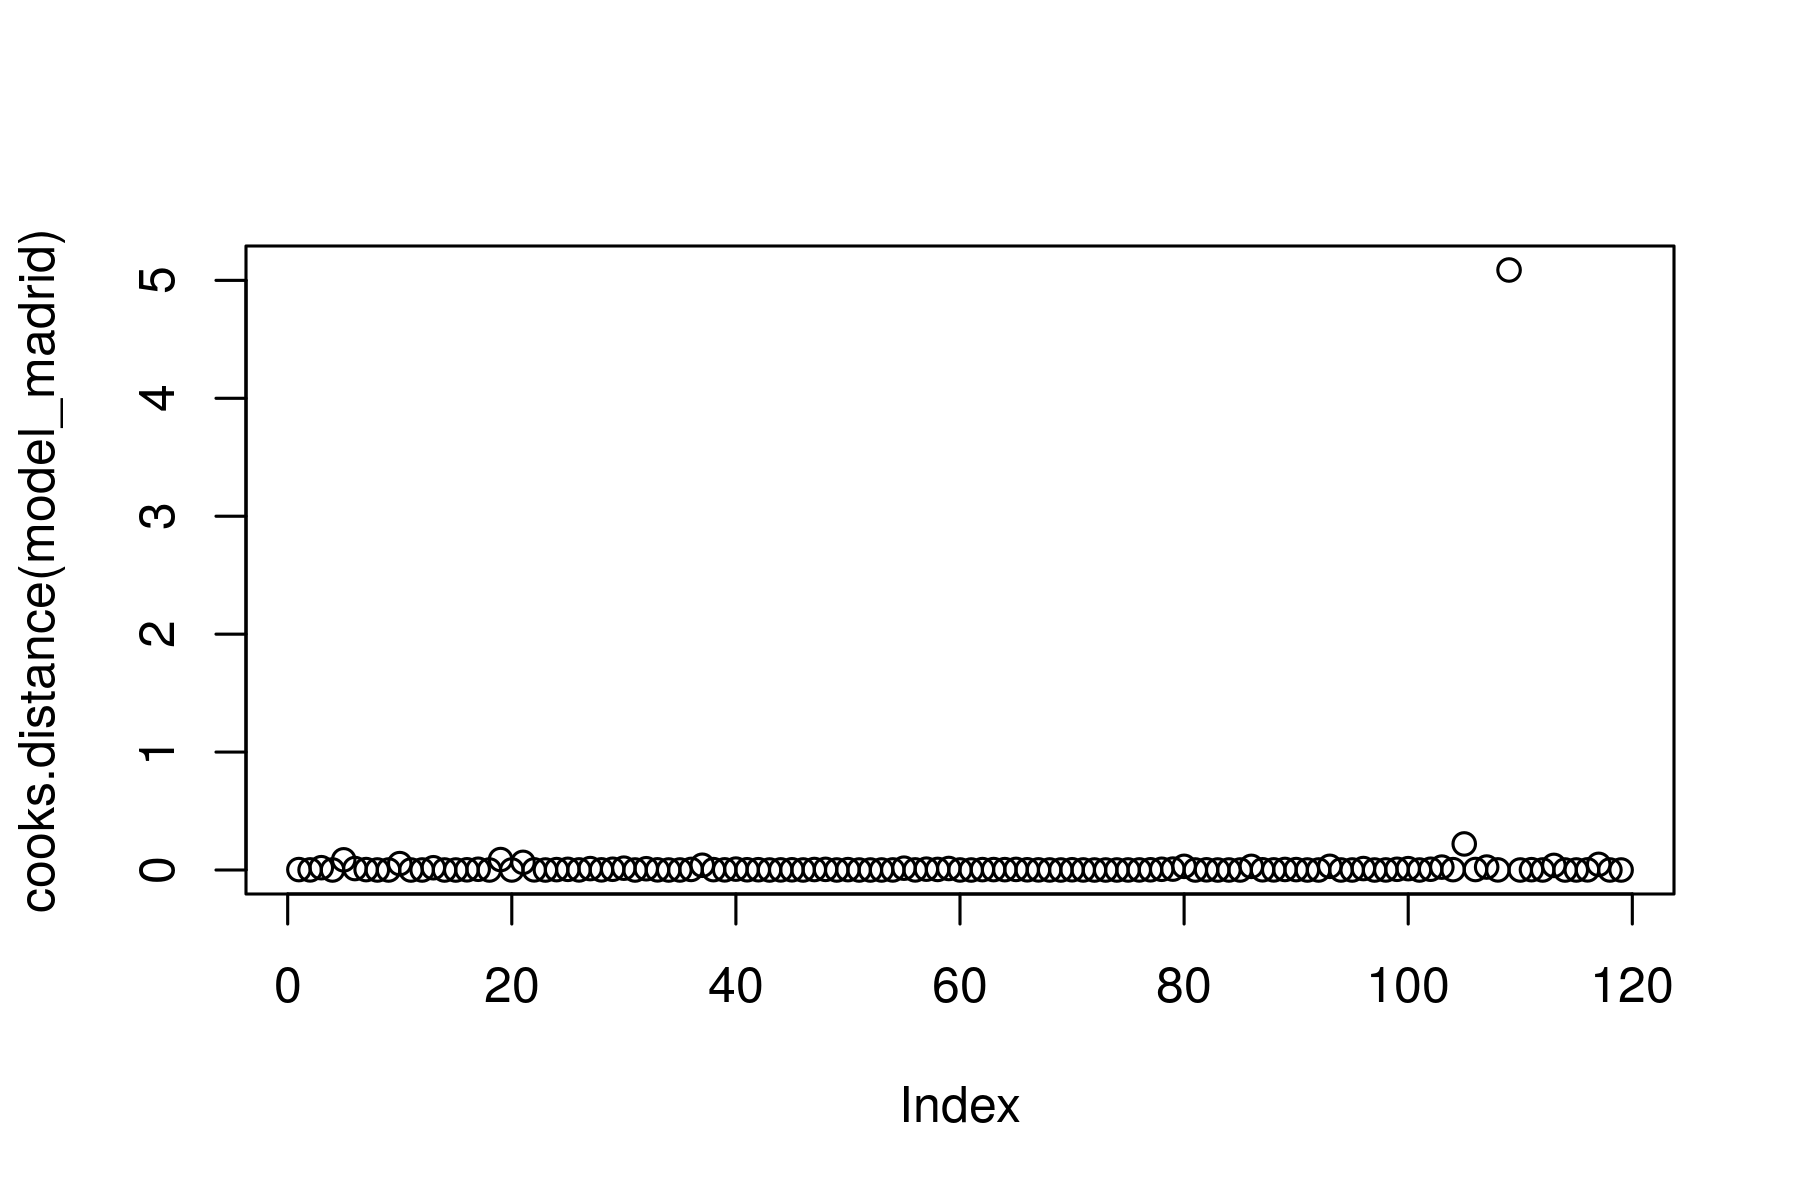

In [70]:
#Utilizamos la distancia de Cooks
plot(cooks.distance(model_madrid))

In [71]:
train.df_clean<-train.df[cooks.distance(model_madrid)<1,]

#Comprobamos que se han borrado datos
dim(train.df_clean)
dim(train.df)

model_madrid_clean <- lm(Square.Meters~Bedrooms + Beds + Bathrooms + nid,train.df_clean)

[1] 3887   14

[1] 3920   14

In [72]:
summary(model_madrid_clean)


Call:
lm(formula = Square.Meters ~ Bedrooms + Beds + Bathrooms + nid, 
    data = train.df_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-98.63 -12.87  -1.11  11.39 142.82 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.5896    10.2784  -1.225 0.223269    
Bedrooms     10.2637     3.9606   2.591 0.010865 *  
Beds          7.0799     1.8947   3.737 0.000299 ***
Bathrooms    36.8431     5.2883   6.967 2.58e-10 ***
nid2          3.9062    11.0579   0.353 0.724584    
nid3         -4.6891    10.6289  -0.441 0.659969    
nid4         22.2225    11.4354   1.943 0.054557 .  
nid5        -15.1148    13.0608  -1.157 0.249695    
nid6          0.1214     9.7029   0.013 0.990041    
nid7          3.4725    18.0957   0.192 0.848180    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.29 on 109 degrees of freedom
  (3768 observations deleted due to missingness)
Multiple R-squared:  0.7417,	Adjusted R-squar

[1] 28.97712

[1] 0.4341034

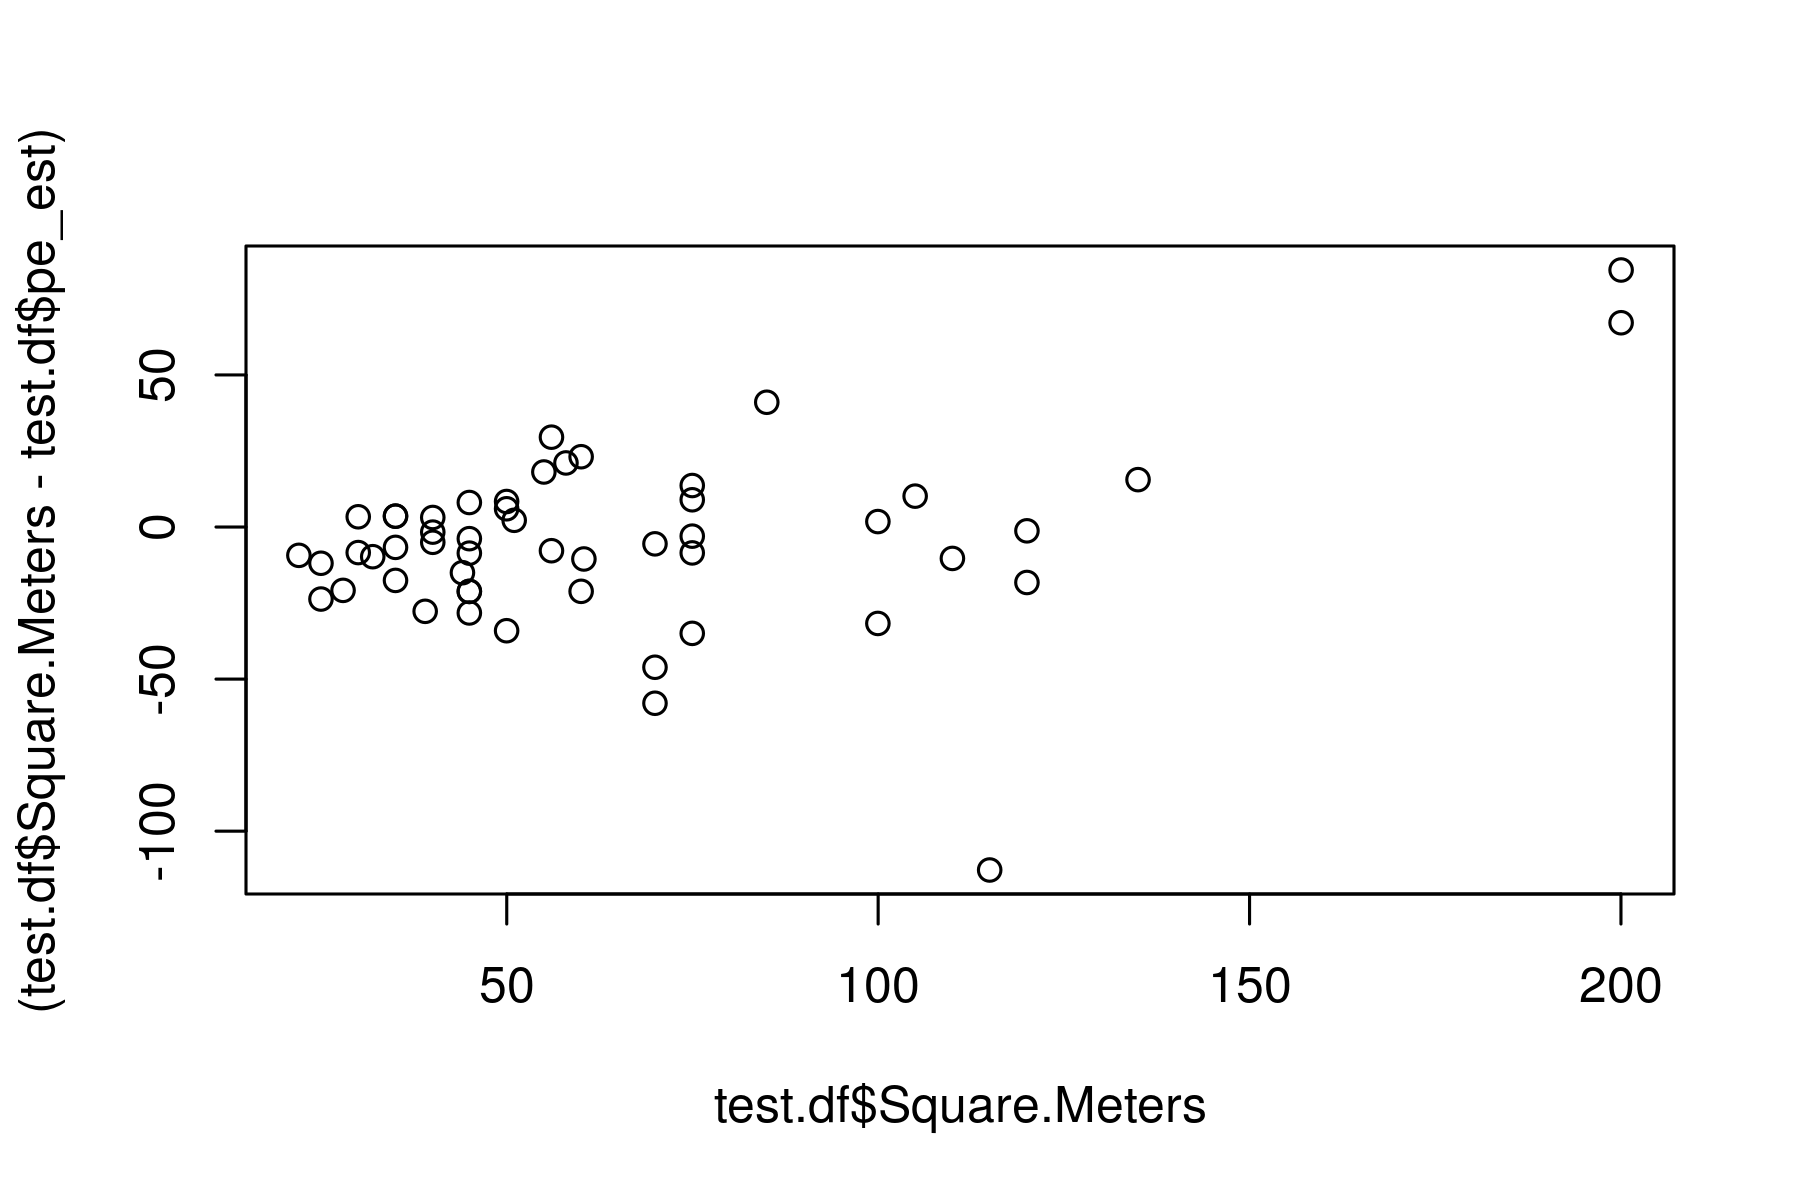

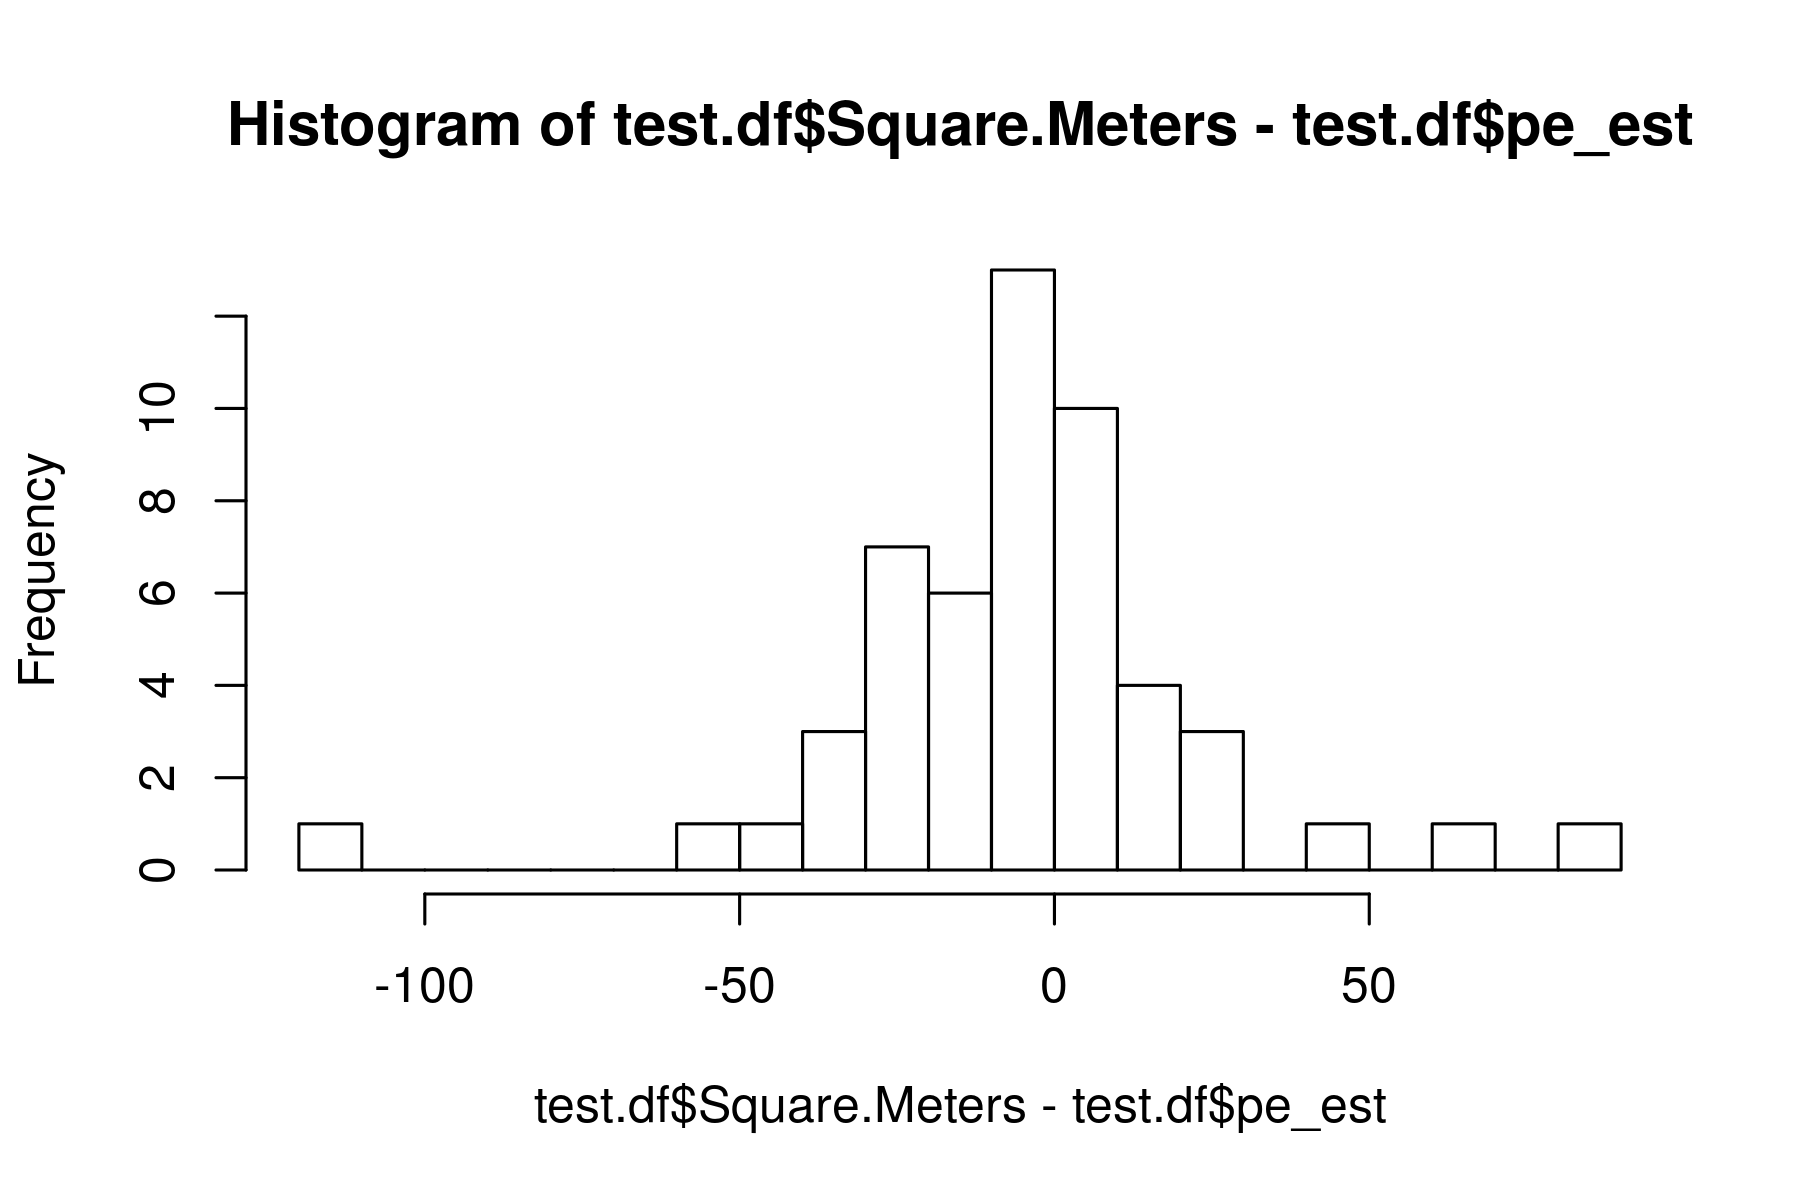

In [49]:
test.df$pe_est<-predict(modelprueba,test.df)

sqrt(mean((test.df$Square.Meters-test.df$pe_est)^2,na.rm=T))
R2<-na.omit(test.df[,c("Square.Meters","pe_est")])
myrsquared(R2$Square.Meters,R2$pe_est)

plot(test.df$Square.Meters,(test.df$Square.Meters-test.df$pe_est))
hist(test.df$Square.Meters-test.df$pe_est,20)

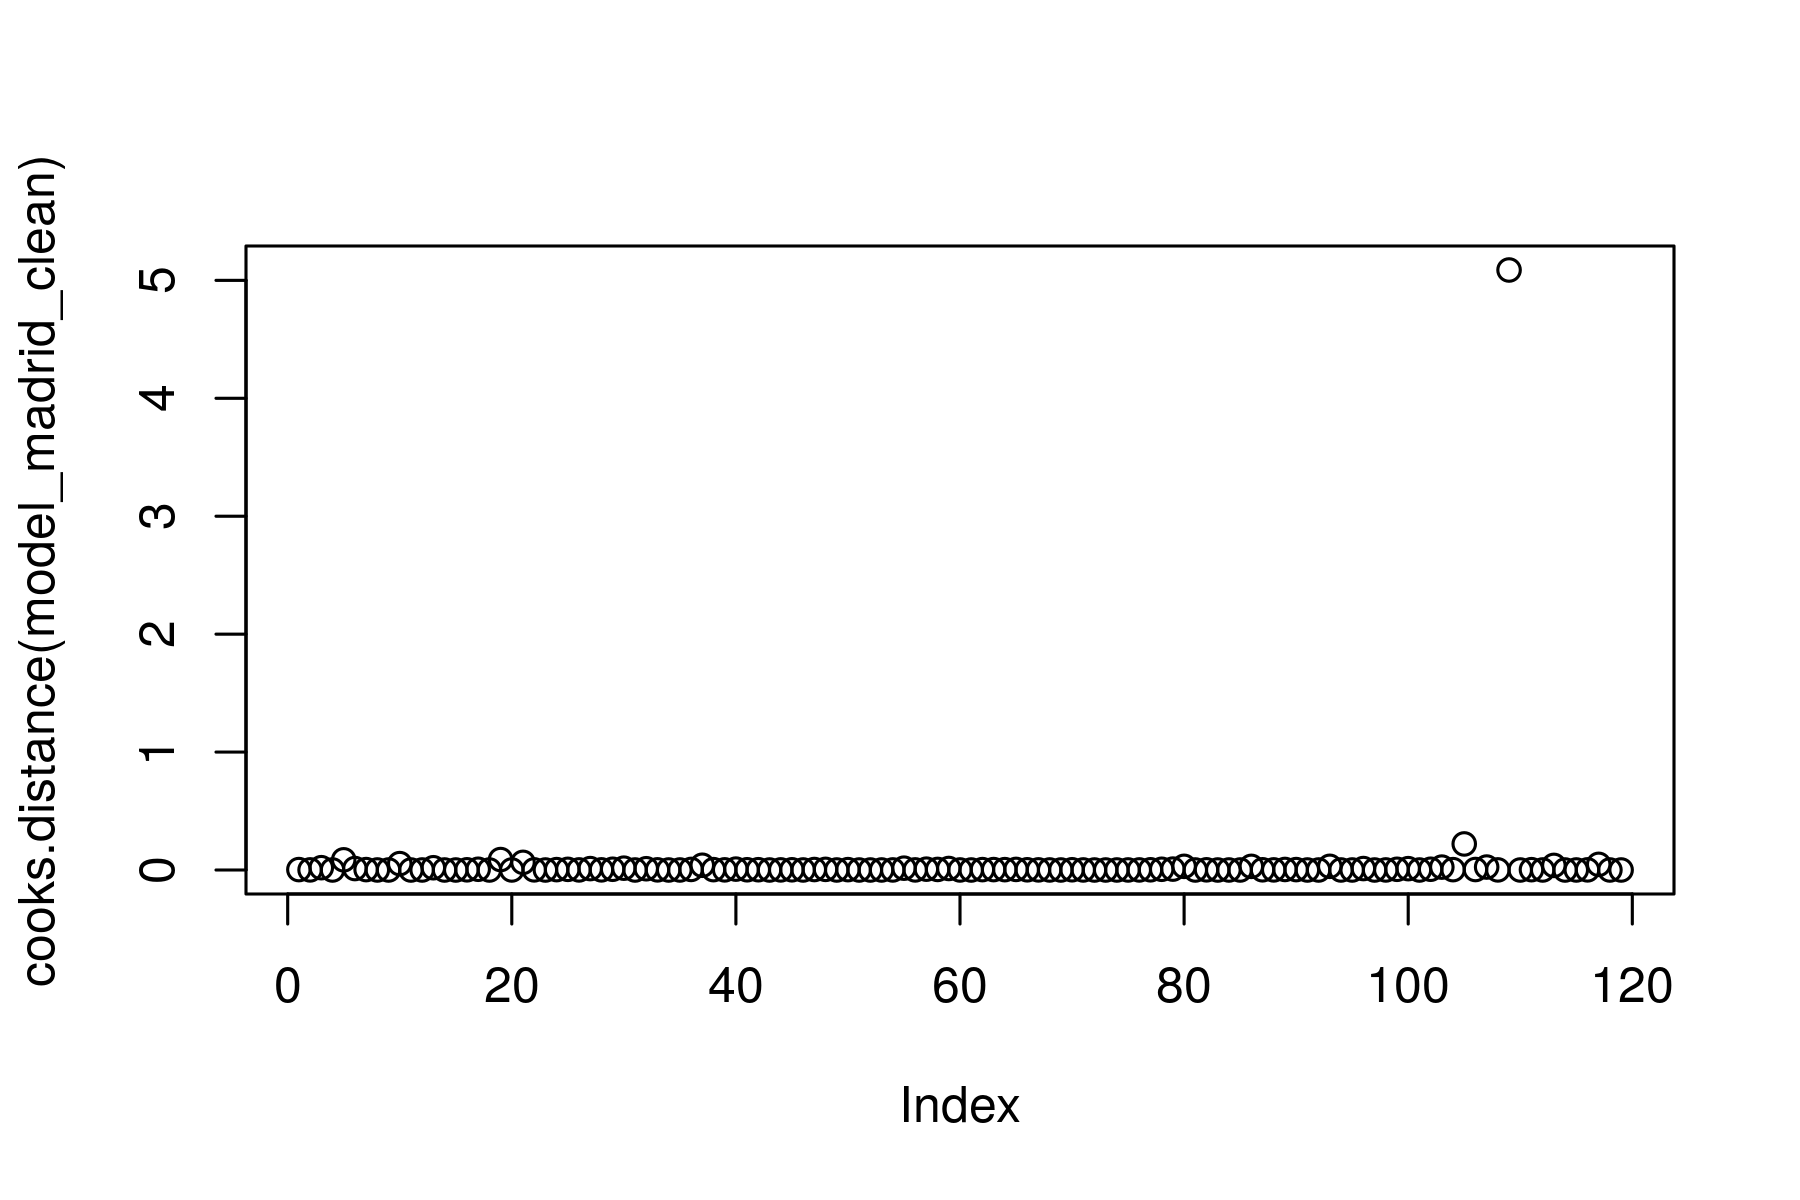

In [73]:
#No entiendo porque no mejora quitando esos valores, a lo mejor son muy pocos.
plot(cooks.distance(model_madrid_clean))

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [53]:
paste('El Barrio Sol pertenece al Cluster: ', unique(df_madrid[which(df_madrid$Neighbourhood=="Sol"),]$nid))

[1] "El Barrio Sol pertenece al Cluster:  3"

In [54]:
str(df_madrid)

'data.frame':	5601 obs. of  14 variables:
 $ Neighbourhood       : Factor w/ 65 levels "Acacias","Adelfas",..: 49 49 49 41 41 41 41 41 41 41 ...
 $ Accommodates        : int  3 5 6 4 4 2 2 6 6 2 ...
 $ Bathrooms           : num  1 2 1 1 1 1 1 1 1 1 ...
 $ Bedrooms            : int  0 2 2 1 1 1 0 3 3 0 ...
 $ Beds                : int  2 3 4 2 1 1 1 3 6 1 ...
 $ Price               : int  65 100 89 49 89 61 72 85 170 60 ...
 $ Square.Feet         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  2 4 2 2 2 1 1 1 1 1 ...
 $ Extra.People        : int  10 25 10 20 15 0 0 0 0 0 ...
 $ Review.Scores.Rating: int  96 97 94 89 97 95 88 78 NA 89 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.71 -3.71 -3.71 -3.71 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ nid                 : Factor w/ 7 levels "1","2","3","4",..: 3 3 3 6 6 6 6 6 6 6 ...


In [60]:
anuncio<-data.frame(Accommodates = 6, Bathrooms= 2, Bedrooms = 3, Beds= 4, Price = 80, Square.Feets = NA, Guests.Included= 7, Extra.People = NA,  Review.Scores.Rating = NA, Latitude = NA, Longitude = NA, Square.Meters = NA, nid = '3')
anuncio$Square.Meters.PD<-predict(modelprueba,anuncio)
anuncio

Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feets,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,nid,Square.Meters.PD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<dbl>
6,2,3,4,80,NA,7,NA,NA,NA,NA,NA,3,115.5183


Como vimos en los coeficientes del modelo, aumentan unos 10m^2 por cada habitación.

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [76]:
relleno.df<-test.df
relleno.df[7]<-NULL


relleno.df$Square.Meters<-ifelse(is.na(relleno.df$Square.Meters), relleno.df$pe_est, relleno.df$Square.Meters)

head(relleno.df)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,nid,pe_est
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
19,Palacio,5,2,2,3,100,4,25,97,40.41934,-3.709556,98.17467,3,98.17467
22,La Latina,4,1,1,1,89,2,15,97,40.41205,-3.708516,41.71852,6,41.71852
49,Embajadores,2,1,1,1,65,1,0,88,40.40942,-3.693957,41.71852,6,41.71852
53,Embajadores,3,1,2,2,43,2,5,85,40.40727,-3.700293,59.06212,6,59.06212
62,La Latina,4,1,1,2,65,2,12,94,40.40748,-3.710191,48.79838,6,48.79838
67,Embajadores,4,1,2,2,46,1,12,93,40.40912,-3.700638,44.03602,6,59.06212


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [148]:
madrid.df_PCA<-relleno.df[c('Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 'Latitude', 'Longitude','Square.Meters')]
head(madrid.df_PCA)

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
19,5,2,2,3,100,4,25,97,40.41934,-3.709556,98.17467
22,4,1,1,1,89,2,15,97,40.41205,-3.708516,41.71852
49,2,1,1,1,65,1,0,88,40.40942,-3.693957,41.71852
53,3,1,2,2,43,2,5,85,40.40727,-3.700293,59.06212
62,4,1,1,2,65,2,12,94,40.40748,-3.710191,48.79838
67,4,1,2,2,46,1,12,93,40.40912,-3.700638,44.03602


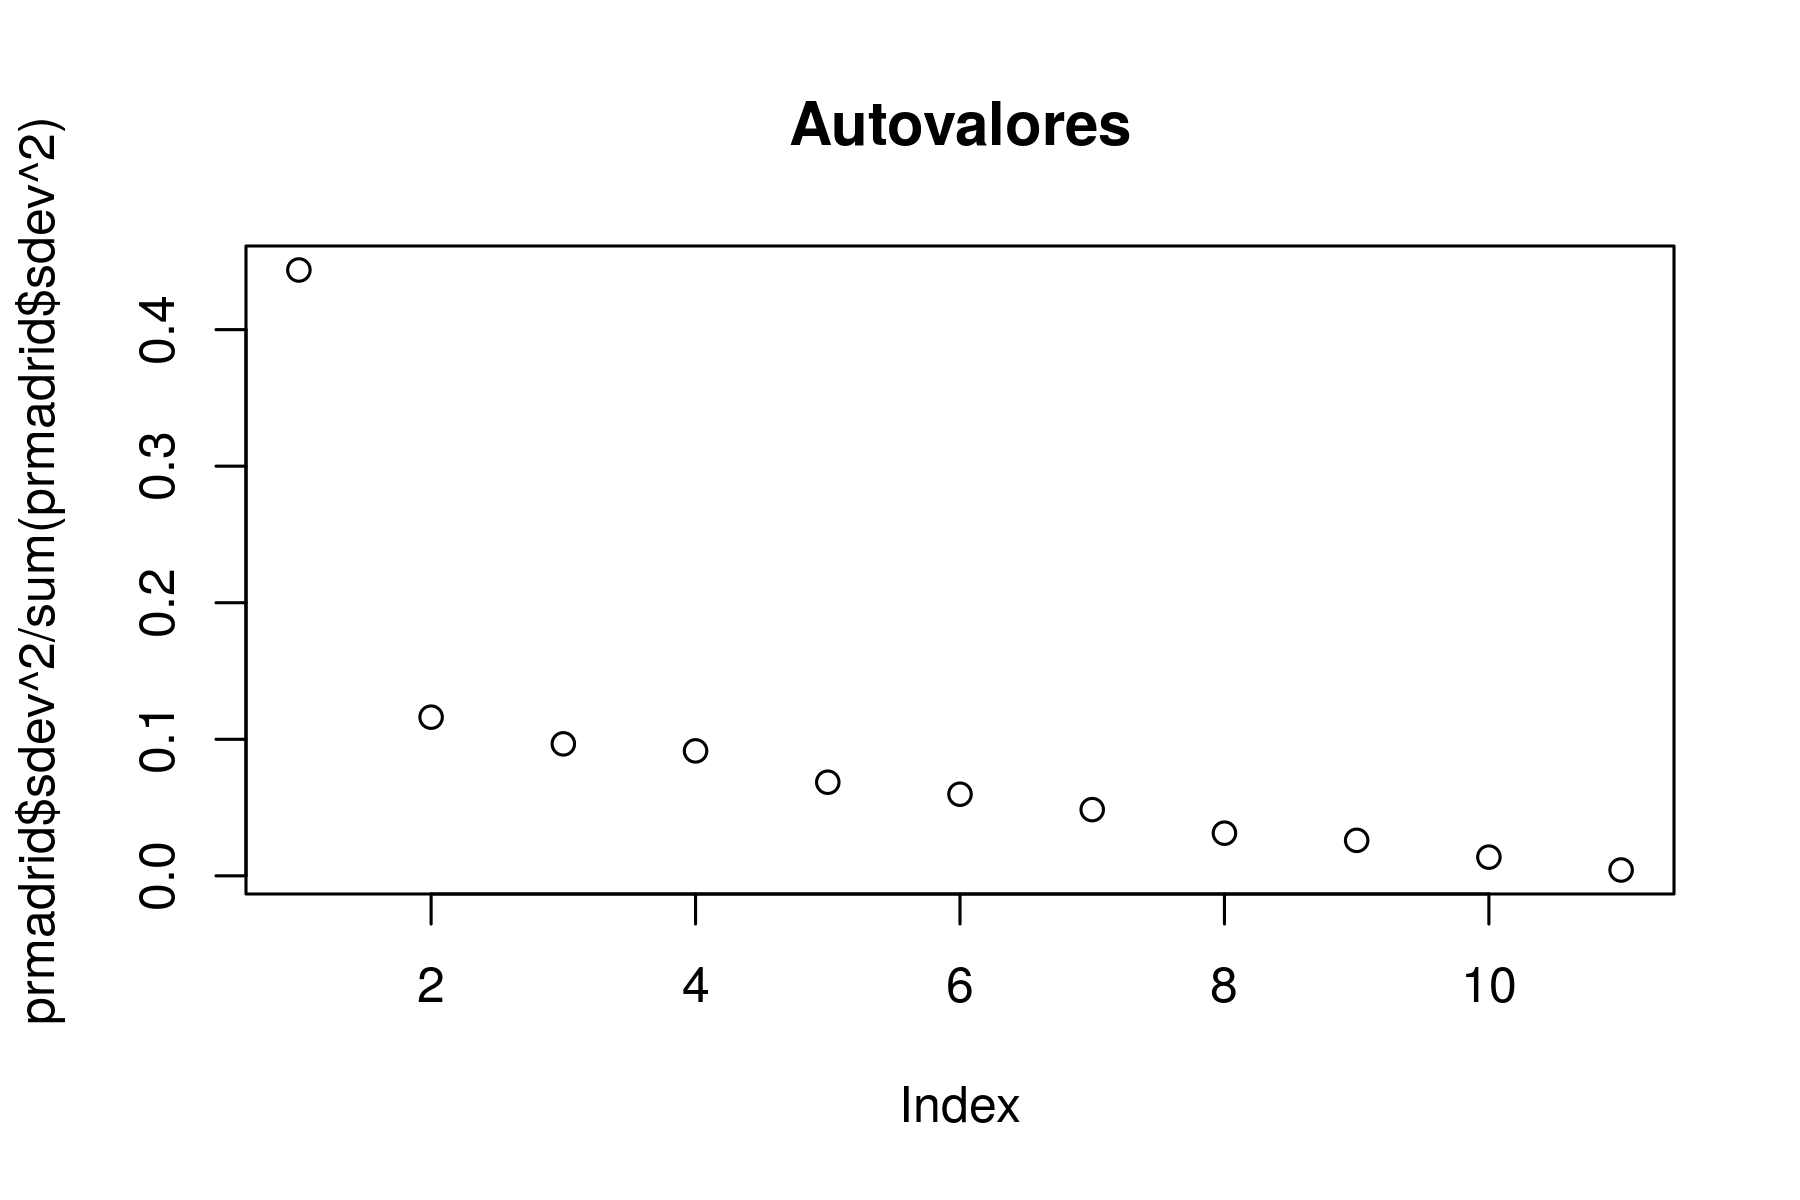

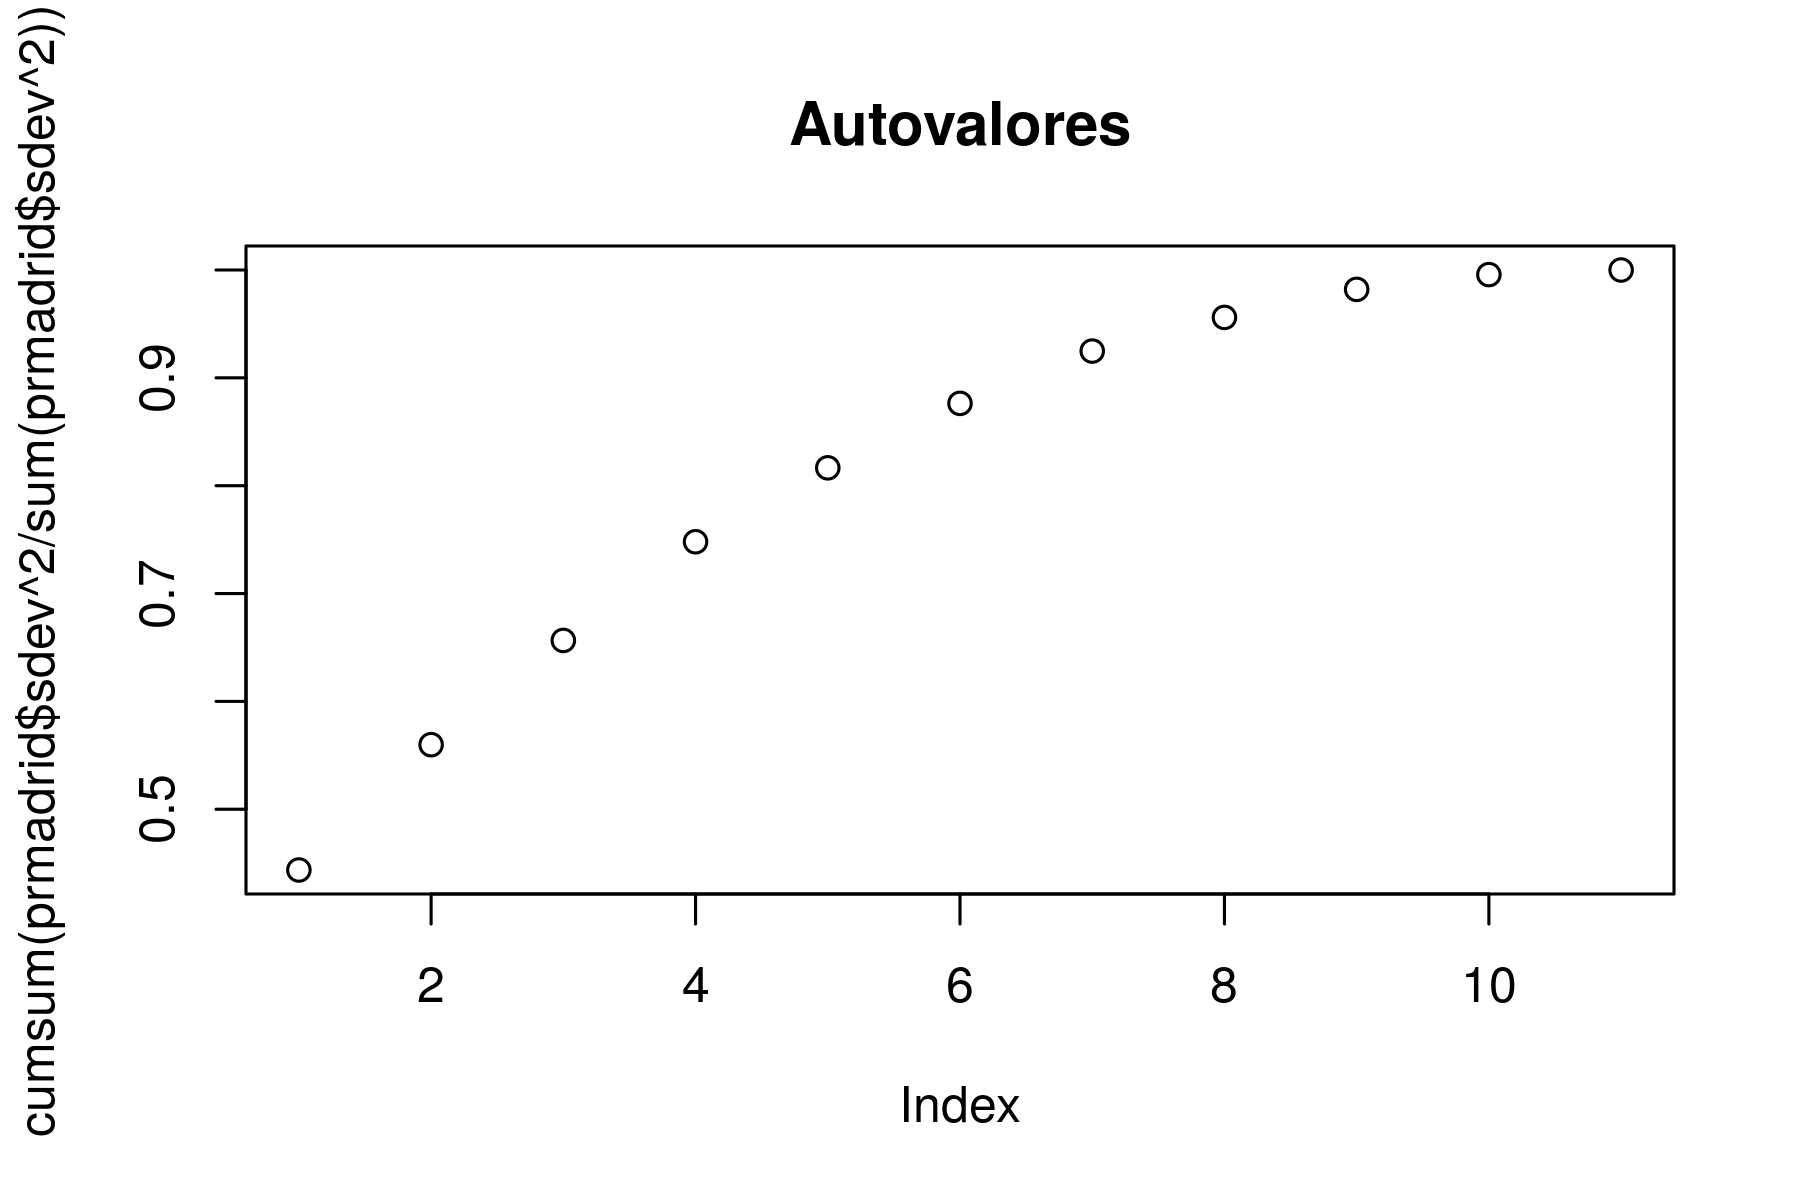

In [173]:
#Lanzamos el PCA
sinNA.df<-na.omit(madrid.df_PCA)

prmadrid<-prcomp(sinNA.df,center = TRUE, scale = TRUE) #Aplicamos PCA

plot(prmadrid$sdev^2/sum(prmadrid$sdev^2),main="Autovalores")
plot(cumsum(prmadrid$sdev^2/sum(prmadrid$sdev^2)),main="Autovalores")


Podemos decir que en 6 PC tendriamos toda la informacion necesaria, por lo que podriamos comparar la matriz de componentes solo con 6 y perderiamos poca informacion.

In [186]:
id_apartment<-295
number_of_pca_components<-6


#Hacemos la prediccion
apartment<-sinNA.df[id_apartment,]
predict1 <- predict(prmadrid, apartment)


t_apartment<- matrix(predict1[1:number_of_pca_components],nrow=1)


dist<-rowSums((t_apartment[rep(1, times = nrow(prmadrid$x[,1:number_of_pca_components])), ]-prmadrid$x[,1:number_of_pca_components])^2)


order(dist)[1:5]

sinNA.df[order(dist)[1],]
sinNA.df[order(dist)[2],]
sinNA.df[order(dist)[3],]
sinNA.df[order(dist)[4],]
sinNA.df[order(dist)[5],]


[1] 295  76 853 780  72

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
3466,4,1,0,2,57,2,10,89,40.41128,-3.695756,42.31944


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
872,3,1,1,2,56,2,12,89,40.41262,-3.698824,52.58318


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
8600,4,1,0,2,50,2,8,89,40.40951,-3.701476,38.53463


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
8108,4,1,1,1,40,2,10,92,40.41013,-3.697536,41.71852


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
841,4,1,0,2,50,2,8,90,40.40953,-3.70286,38.53463


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [179]:
as.matrix(sinNA.df[233,], nrow=1) %*% prmadrid$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
2669,-50.42814,-7.713451,20.24442,-94.74896,48.07275,-13.655,4.870717,-30.66557,-8.522363,4.86809,-40.95179
